# Mexíco FC 
---
Investigación de la categoría para buscar el ascenso a la segunda federación. 

- Investigación de las últimas temporadas y saber lo que se necesita para acceder a los 5 puestos: 

* Puntos necesarios. 
* Balance de Diferencia de goles
* Goles a favor necesarios 
* Goles en contra necesarios
* Porteria a 0 necesarias
* Promedio de gol necesario 

_____

### Funte de datos BeSoccer 

Se van a extraer los datos de las últimas 3 temporadas dla categoría tercera federación de la comunidad de Madrid Y División de Honor de la comunidad de Madrid. 

Objetivo: Conocer la cetegoría, establecer los objtivos para lograr los primeros 5 puestos y conformar un modelo de scouting básico para crear un plantilla para el ascenso. 

#### Objetivo de scouting: 

* Base de jugadores veteranos para luchar el ascenso, buscar dentro de los equipos menos goleados, los 5 primeros equipos, los equipos de las jornadas. 

* Base de jugadores jovenes de división de honor que pueda ser potencial de crecimiento. 

* Análisis de plantilla de Mexico FC 

In [1]:
import pandas as pd 

In [116]:
import requests
import pandas as pd
from bs4 import BeautifulSoup

url = "https://es.besoccer.com/competicion/clasificacion/tercera_division_rfef/2022/grupo7"

try:
    # Hacer la petición a la URL
    response = requests.get(url)
    response.raise_for_status()  # Verificar que la petición fue exitosa

    # Usar pandas para extraer las tablas del HTML
    dfs = pd.read_html(response.text)  # Esto devuelve una lista de DataFrames
    
    if dfs:
        # Seleccionar la primera tabla (o la que corresponda)
        df = dfs[0]  # Si hay varias tablas, prueba dfs[1], dfs[2], etc.
        
        # Mostrar el DataFrame
        print(df)
        
        # Opcional: Guardar en CSV
        df.to_csv("clasificacion_tercera_division.csv", index=False)
    else:
        print("No se encontraron tablas en la página.")

except requests.exceptions.RequestException as e:
    print(f"Error al acceder a la URL: {e}")

    Unnamed: 0  Unnamed: 1                               Unnamed: 2  PTS  PJ  \
0            1         NaN                Atlético B  V  V  V  V  V   95  40   
1            2         NaN                 Las Rozas  V  E  V  D  V   75  40   
2            3         NaN  CDE Fuenlabrada Promesas  E  E  D  V  D   72  40   
3            4         NaN                Alcorcón B  D  E  V  E  V   69  40   
4            5         NaN                 México FC  E  V  E  V  V   66  40   
5            6         NaN                CD Ursaria  D  V  E  V  V   64  40   
6            7         NaN                RSD Alcalá  D  V  E  V  V   64  40   
7            8         NaN                  Getafe B  E  V  V  D  D   61  40   
8            9         NaN          Rayo Vallecano B  E  E  E  D  V   57  40   
9           10         NaN            AD Torrejón CF  D  E  D  V  E   57  40   
10          11         NaN                CF Pozuelo  E  E  D  D  V   57  40   
11          12         NaN              

C:\Users\Legion\AppData\Local\Temp\ipykernel_35172\4095607175.py:13: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  dfs = pd.read_html(response.text)  # Esto devuelve una lista de DataFrames


In [187]:
import pandas as pd
import re

def limpiar_df_clasificacion(df):
    """
    Limpia el DataFrame de clasificación de fútbol:
    1. Elimina columnas innecesarias
    2. Renombra la columna de equipos
    3. Limpia los nombres de los equipos
    """
    # Hacer una copia para no modificar el original
    df_limpio = df.copy()
    
    # 1. Eliminar columnas no necesarias
    columnas_a_eliminar = ['Unnamed: 0', 'Unnamed: 1']
    for col in columnas_a_eliminar:
        if col in df_limpio.columns:
            df_limpio.drop(col, axis=1, inplace=True)
    
    # 2. Renombrar la columna de equipos
    if 'Unnamed: 2' in df_limpio.columns:
        df_limpio = df_limpio.rename(columns={'Unnamed: 2': 'Equipo'})
    
    # 3. Limpiar los nombres de los equipos (eliminar letras V, E, D después del nombre)
    if 'Equipo' in df_limpio.columns:
        df_limpio['Equipo'] = df_limpio['Equipo'].apply(lambda x: re.sub(r'[VED\s]+$', '', str(x)).strip())
    
    return df_limpio

In [35]:
df_limpio = limpiar_df_clasificacion(df)
df_limpio.to_csv("D:\Mexico FC\Data_clasificación\clasificació_2022.csv", index=False)

---
### Concat de las ultimas 4 temporas 

* Buscar el promedio de los puntos necesarios para el puesto 1 (Asender directo)
* Promedio para estar dentro de los puestos playoff
* Promedio de goles a favor y encontra para puesto 1 (asender directo)
* Promedio de goles a favor y encotra para puestos playoff 
* Balance necesario para mantener el rendimiento 

In [96]:
# Import de los df
temporada_2025 = pd.read_csv('Data_clasificación\clasificació_2025.csv')
temporada_2024 = pd.read_csv('Data_clasificación\clasificació_2024.csv')
temporada_2023 = pd.read_csv('Data_clasificación\clasificació_2023.csv')
temporada_2022 = pd.read_csv('Data_clasificación\clasificació_2022.csv')

temporada_2025['Temporada'] = '2025'
temporada_2024['Temporada'] = '2024'
temporada_2023['Temporada'] = '2023'
temporada_2022['Temporada'] = '2022'

---
Estudio de la ultima temporada. 

In [97]:
temporada_2025

,Equipo,PTS,PJ,PG,PE,PP,GF,GC,DG,Temporada
0,RSD Alcalá,75,34,23,6,5,68,32,36,2025
1,Rayo Vallecano B,61,34,18,7,9,71,52,19,2025
2,AD Torrejón CF,58,34,17,7,10,55,48,7,2025
3,SAD Villaverde,54,34,14,12,8,52,37,15,2025
4,Galapagar,54,34,14,12,8,45,41,4,2025
5,Las Rozas,54,34,15,9,10,45,42,3,2025
6,CUC Villalba,52,34,14,10,10,44,36,8,2025
7,Leganés B,51,34,13,12,9,58,38,20,2025
8,Alcorcón B,47,34,13,8,13,55,50,5,2025
9,Trival Valderas,46,34,12,10,12,47,47,0,2025


In [98]:
temporada_2025.describe()

,PTS,PJ,PG,PE,PP,GF,GC,DG
count,18.000000,18.0,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000
mean,46.500000,34.0,12.500000,9.000000,12.500000,46.388889,46.388889,0.000000
std,12.939906,0.0,4.341997,1.940285,4.540666,11.697857,10.152594,17.610157
min,22.000000,34.0,5.000000,6.000000,5.000000,29.000000,29.000000,-32.000000
25%,39.000000,34.0,10.000000,8.000000,9.250000,39.000000,38.750000,-9.750000
50%,46.500000,34.0,12.500000,8.500000,12.000000,44.500000,47.500000,2.000000
75%,54.000000,34.0,14.000000,10.000000,15.500000,54.250000,51.750000,7.750000
max,75.000000,34.0,23.000000,12.000000,22.000000,71.000000,68.000000,36.000000


* La media de puntos es de 46 PTS 
* La media de PE es de 9 
* La Media de PP 12 
* Media de goles a favor 46 
* Media de GC 46 



In [102]:
top_5_T25 = temporada_2025.head(5)
top_5_T25.describe()

,PTS,PJ,PG,PE,PP,GF,GC,DG
count,5.000000,5.0,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000
mean,60.400000,34.0,17.200000,8.800000,8.000000,58.200000,42.000000,16.200000
std,8.677557,0.0,3.701351,2.949576,1.870829,10.986355,8.093207,12.597619
min,54.000000,34.0,14.000000,6.000000,5.000000,45.000000,32.000000,4.000000
25%,54.000000,34.0,14.000000,7.000000,8.000000,52.000000,37.000000,7.000000
50%,58.000000,34.0,17.000000,7.000000,8.000000,55.000000,41.000000,15.000000
75%,61.000000,34.0,18.000000,12.000000,9.000000,68.000000,48.000000,19.000000
max,75.000000,34.0,23.000000,12.000000,10.000000,71.000000,52.000000,36.000000


Media del Top 5 Equipos

* PTS 60 
* PG 12
* PE 8
* PP 8
* GF 58
* GC 42
* DF 16

---
Equipos con mejor diferencia de goles


In [104]:
temporada_2025

,Equipo,PTS,PJ,PG,PE,PP,GF,GC,DG,Temporada
0,RSD Alcalá,75,34,23,6,5,68,32,36,2025
1,Rayo Vallecano B,61,34,18,7,9,71,52,19,2025
2,AD Torrejón CF,58,34,17,7,10,55,48,7,2025
3,SAD Villaverde,54,34,14,12,8,52,37,15,2025
4,Galapagar,54,34,14,12,8,45,41,4,2025
5,Las Rozas,54,34,15,9,10,45,42,3,2025
6,CUC Villalba,52,34,14,10,10,44,36,8,2025
7,Leganés B,51,34,13,12,9,58,38,20,2025
8,Alcorcón B,47,34,13,8,13,55,50,5,2025
9,Trival Valderas,46,34,12,10,12,47,47,0,2025


In [105]:
# Aquí podemos buscar los delanteros. 
temporada_2025.sort_values('DG', ascending=False).head()

,Equipo,PTS,PJ,PG,PE,PP,GF,GC,DG,Temporada
0,RSD Alcalá,75,34,23,6,5,68,32,36,2025
7,Leganés B,51,34,13,12,9,58,38,20,2025
1,Rayo Vallecano B,61,34,18,7,9,71,52,19,2025
3,SAD Villaverde,54,34,14,12,8,52,37,15,2025
6,CUC Villalba,52,34,14,10,10,44,36,8,2025


In [111]:
# Aquí podemos buscar los delanteros y medios 
temporada_2025.sort_values('GF', ascending=False).head(6)

,Equipo,PTS,PJ,PG,PE,PP,GF,GC,DG,Temporada
1,Rayo Vallecano B,61,34,18,7,9,71,52,19,2025
0,RSD Alcalá,75,34,23,6,5,68,32,36,2025
7,Leganés B,51,34,13,12,9,58,38,20,2025
2,AD Torrejón CF,58,34,17,7,10,55,48,7,2025
8,Alcorcón B,47,34,13,8,13,55,50,5,2025
3,SAD Villaverde,54,34,14,12,8,52,37,15,2025


In [110]:
# Aquí podemos buscar los defensas y portero. 
temporada_2024.sort_values('GC', ascending=True).head(6)

,Equipo,PTS,PJ,PG,PE,PP,GF,GC,DG,Temporada
0,Real Madrid C,76,34,23,7,4,62,18,44,2024
1,CD Móstoles,63,34,17,12,5,57,33,24,2024
2,Leganés B,58,34,16,10,8,47,33,14,2024
7,Alcorcón B,45,34,11,12,11,36,33,3,2024
8,AD Torrejón CF,44,34,9,17,8,40,38,2,2024
3,Las Rozas,50,34,13,11,10,51,39,12,2024


---

In [89]:
tercera_federacion = pd.concat([temporada_2025, temporada_2024, 
                                temporada_2023])

tercera_federacion.head()

,Equipo,PTS,PJ,PG,PE,PP,GF,GC,DG,Temporada
0,RSD Alcalá,75,34,23,6,5,68,32,36,2025
1,Rayo Vallecano B,61,34,18,7,9,71,52,19,2025
2,AD Torrejón CF,58,34,17,7,10,55,48,7,2025
3,SAD Villaverde,54,34,14,12,8,52,37,15,2025
4,Galapagar,54,34,14,12,8,45,41,4,2025


In [90]:
tercera_federacion.describe()

,PTS,PJ,PG,PE,PP,GF,GC,DG
count,52.000000,52.000000,52.00000,52.000000,52.000000,52.000000,52.000000,52.000000
mean,44.769231,32.769231,12.00000,8.769231,12.000000,43.096154,43.096154,0.000000
std,12.372670,1.864166,4.20084,2.873922,4.288608,11.438256,10.368239,18.241302
min,16.000000,30.000000,4.00000,4.000000,2.000000,21.000000,18.000000,-43.000000
25%,37.000000,30.000000,9.00000,7.000000,9.750000,35.750000,37.750000,-11.000000
50%,44.500000,34.000000,11.00000,8.500000,12.000000,42.000000,44.500000,-1.000000
75%,51.250000,34.000000,14.00000,10.250000,15.000000,48.250000,48.250000,7.250000
max,76.000000,34.000000,23.00000,17.000000,22.000000,73.000000,68.000000,46.000000


In [117]:
from selenium import webdriver
from selenium.webdriver.chrome.options import Options

url = "https://es.besoccer.com/equipo/plantilla/union-collado-villalba"

# Configurar Selenium para que funcione en modo headless (sin abrir navegador)
options = Options()
options.add_argument("--headless")  # Ejecución en segundo plano
options.add_argument("user-agent=Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/119.0.0.0 Safari/537.36")

driver = webdriver.Chrome(options=options)  # Asegúrate de tener ChromeDriver en PATH

try:
    driver.get(url)
    print(driver.page_source)  # Imprime el HTML completo
finally:
    driver.quit()  # Cierra el navegador

<html lang="es"><head>
        <title>Plantilla del CUC Villalba | Listado de Jugadores | BeSoccer</title>
        <meta charset="utf-8">
        <meta name="viewport" content="width=device-width, initial-scale=1">
        <meta name="theme-color" content="#51a331">
        <meta name="jungleup" content="5d0fed68154e52109a581e4a59e5dc85">
        <meta property="fb:pages" content="207013372805">
        <link href="https://fonts.googleapis.com/css?family=Asap+Condensed:wght@400;600&amp;&amp;display=swap" rel="stylesheet">
        <link rel="manifest" href="/manifest.webmanifest?v=2">
                    <link rel="canonical" href="https://es.besoccer.com/equipo/plantilla/union-collado-villalba">
                        
                                    <link rel="stylesheet" type="text/css" href="/media/css/style.css?20250603.5481">
                    
        <link rel="apple-touch-icon-precomposed" href="/media/img/favicon/favicon-152.png">
        <meta name="msapplication-TileC

In [367]:
from selenium import webdriver
from selenium.webdriver.chrome.options import Options
import pandas as pd

# Configurar Selenium (modo headless para ejecución en segundo plano)
chrome_options = Options()
chrome_options.add_argument("--headless")  # Elimina esta línea si quieres ver el navegador
chrome_options.add_argument("user-agent=Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/119.0.0.0 Safari/537.36")

url = "https://es.besoccer.com/equipo/plantilla/rayo-vallecano-b"

try:
    # Inicializar el navegador
    driver = webdriver.Chrome(options=chrome_options)
    driver.get(url)
    
    # Esperar brevemente para asegurar la carga (opcional)
    driver.implicitly_wait(5)
    
    # Extraer todas las tablas de la página
    dfs = pd.read_html(driver.page_source)
    
    if not dfs:
        print("No se encontraron tablas en la página.")
    else:
        # Mostrar cada DataFrame con mejor formato
        for i, df in enumerate(dfs, 1):
            print(f"\n=== Tabla {i} ({len(df)} filas × {len(df.columns)} columnas) ===")
            print(df.to_string(index=False))  # Mejor formato sin índices
            print("\n" + "="*50)
            
            # Guardar en CSV si lo deseas (opcional)
            df.to_csv(f"tabla_{i}.csv", index=False, encoding='utf-8-sig')
    
finally:
    driver.quit()

# Ahora puedes manipular los DataFrames fuera del bloque Selenium
# Ejemplo: Acceder a la primera tabla
if 'dfs' in locals() and len(dfs) > 0:
    primera_tabla = dfs[0]
    print("\nPrimera tabla lista para análisis:")
    print(primera_tabla.head())

C:\Users\Legion\AppData\Local\Temp\ipykernel_35172\777188447.py:21: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  dfs = pd.read_html(driver.page_source)



=== Tabla 1 (33 filas × 17 columnas) ===
       Porteros      Porteros.1        Porteros.2  Unnamed: 3 PJ PT  Unnamed: 6  Unnamed: 7  Unnamed: 8 Edad  cm    € rating Temp. PJ.1  Unnamed: 15  Unnamed: 16
             13             NaN            Juanpe         NaN 25 25        34.0         0.0         4.0   24 188  57K     44     1   25         34.0          5.0
             25             NaN     Adrián Molina         NaN 11  9        17.0         0.0         1.0   19 188  15K     45     2   11         17.0          1.0
              1             NaN            Benedi         NaN  0  0         0.0         0.0         0.0   22 185   2K     32     4    5          8.0          0.0
       Defensas        Defensas          Defensas         NaN PJ PT         NaN         NaN         NaN Edad  cm    € rating Temp.   PJ          NaN          NaN
              2             NaN Marco De Las Sías         NaN 27 27         5.0         0.0        13.0   19 180 117K     44     1   27          5.0

In [392]:
import pandas as pd

# Identificar las filas donde cambia la categoría
categorias = ['Porteros', 'Defensas', 'Centrocampistas', 'Delanteros']
indices_categorias = {}

for categoria in categorias:
    mask = primera_tabla['Porteros.2'] == categoria
    if mask.any():
        indices_categorias[categoria] = primera_tabla[mask].index[0]

# Ordenar los índices
indices_ordenados = sorted(indices_categorias.values())

# Dividir el DataFrame en partes (incluyendo la fila de categoría)
dfs_separados = {}
for i in range(len(indices_ordenados)):
    start = indices_ordenados[i]  # Sin +1 para incluir la categoría
    end = indices_ordenados[i+1] if i+1 < len(indices_ordenados) else len(primera_tabla)
    categoria = primera_tabla.iloc[indices_ordenados[i]]['Porteros.2']
    dfs_separados[categoria] = primera_tabla.iloc[start:end].reset_index(drop=True)

# Mostrar resultados
for categoria, df_cat in dfs_separados.items():
    print(f"\n=== {categoria} ===")
    print(df_cat)


=== Defensas ===
   Porteros Porteros.1         Porteros.2  Unnamed: 3  PJ  PT  Unnamed: 6  \
0  Defensas   Defensas           Defensas         NaN  PJ  PT         NaN   
1         2        NaN  Marco De Las Sías         NaN  27  27         5.0   
2         3        NaN       Diego Robles         NaN  32  32         1.0   
3         5        NaN    Víctor Revuelto         NaN  29  27         0.0   
4        32        NaN      Sergio Lozano         NaN  29  26         0.0   
5        32        NaN        Santi Silva         NaN   1   1         0.0   
6         4        NaN          M. Guzmán         NaN  21  14         0.0   
7        22        NaN         David Mico         NaN   3   1         0.0   

   Unnamed: 7  Unnamed: 8  Edad   cm     €  rating  Temp. PJ.1  Unnamed: 15  \
0         NaN         NaN  Edad   cm     €  rating  Temp.   PJ          NaN   
1         0.0        13.0    19  180  117K      44      1   27          5.0   
2         0.0         4.0    21    -   43K      46 

In [340]:
# Agregar columna 'Posición' a cada DataFrame y luego unirlos
dfs_consolidados = []

for categoria, df in dfs_separados.items():
    df['Posición'] = categoria  # Añade columna con la categoría
    dfs_consolidados.append(df)

# Unir todos los DataFrames en uno solo
df_final = pd.concat(dfs_consolidados, ignore_index=True)

# Mostrar el DataFrame consolidado
print("\n=== DataFrame Consolidado ===")
print(df_final)


=== DataFrame Consolidado ===
   Desconocido Desconocido.1   Desconocido.2  Unnamed: 3  PJ  PT  Unnamed: 6  \
0           13           NaN    Marcos Rubio         NaN  30  30        25.0   
1           33           NaN     Y. Popovych         NaN   0   0         0.0   
2           27           NaN  Dani Gutiérrez         NaN   0   0         0.0   
3          NaN           NaN  William Vezina         NaN   0   0         0.0   
4           99           NaN      A. Ramirez         NaN  16  16         1.0   
5            5           NaN   Richi Aztiria         NaN  22  19         0.0   
6           15           NaN         Alberdi         NaN  30  29         4.0   
7            2           NaN      Dani Tapia         NaN  27  23         0.0   
8           19           NaN     Javi Crespo         NaN  11   9         0.0   
9            3           NaN      J. Batista         NaN   8   4         0.0   
10          23           NaN     Jorge Pérez         NaN  17  15         0.0   
11       

In [344]:
import pandas as pd

def limpiar_dataframe_jugadores(df_original):
    """
    Limpia el dataframe de jugadores, renombrando columnas y seleccionando las relevantes.
    
    Args:
        df_original (pd.DataFrame): DataFrame original con los datos de jugadores
        
    Returns:
        pd.DataFrame: DataFrame limpio con columnas renombradas y seleccionadas
    """
    # Hacer una copia para no modificar el original
    df = df_original.copy()
    
    # Renombrar columnas
    nuevos_nombres = {
        'Porteros': 'Número',
        'Desconocido.2': 'Nombre',
        'PJ': 'Partidos_Jugados',
        'PT': 'Partidos_Titular',
        'Unnamed: 6': 'Goles',
        'Unnamed: 7': 'Asistencias',
        'Unnamed: 8': 'Tarjetas_Amarillas',
        'Edad': 'Edad',
        'cm': 'Altura_cm',
        '€': 'Valor_Mercado',
        'rating': 'Rating',
        'Temp.': 'Temporada',
        'PJ.1': 'Minutos_Jugados',
        'Unnamed: 15': 'Goles_Recibidos',  # Solo para porteros
        'Unnamed: 16': 'Paradas',  # Solo para porteros
        'Posición': 'Posición'
    }
    
    df = df.rename(columns=nuevos_nombres)
    
    # Seleccionar columnas relevantes
    columnas_relevantes = [
        'Número', 'Nombre', 'Posición', 'Partidos_Jugados', 'Partidos_Titular',
        'Goles', 'Asistencias', 'Tarjetas_Amarillas', 'Edad', 'Altura_cm',
        'Valor_Mercado', 'Rating', 'Temporada'
    ]
    
    # Columnas específicas por posición
    if 'Porteros' in df['Posición'].unique():
        columnas_relevantes.extend(['Goles_Recibidos', 'Paradas'])
    
    # Filtrar columnas que realmente existen en el DataFrame
    columnas_relevantes = [col for col in columnas_relevantes if col in df.columns]
    
    return df[columnas_relevantes]

# Uso de la función
df_limpio = limpiar_dataframe_jugadores(df_final)

# Mostrar el resultado
print("\n=== DataFrame Limpio ===")
print(df_limpio.head())

# Opcional: Guardar en CSV
print("\nDatos guardados en 'jugadores_limpio.csv'")


=== DataFrame Limpio ===
           Nombre  Posición Partidos_Jugados Partidos_Titular  Goles  \
0    Marcos Rubio  Porteros               30               30   25.0   
1     Y. Popovych  Porteros                0                0    0.0   
2  Dani Gutiérrez  Porteros                0                0    0.0   
3  William Vezina  Porteros                0                0    0.0   
4      A. Ramirez  Defensas               16               16    1.0   

   Asistencias  Tarjetas_Amarillas Edad Altura_cm Valor_Mercado Rating  \
0          0.0                 2.0   23         -           18K     44   
1          0.0                 0.0   21         -            3K     27   
2          0.0                 0.0   19         -            1K     33   
3          0.0                 0.0   22       190             0      0   
4          0.0                 6.0   33         -           16K     47   

  Temporada  Goles_Recibidos  Paradas  
0         1             25.0      2.0  
1         1     

In [345]:
df_limpio

,Nombre,Posición,Partidos_Jugados,Partidos_Titular,Goles,Asistencias,Tarjetas_Amarillas,Edad,Altura_cm,Valor_Mercado,Rating,Temporada,Goles_Recibidos,Paradas
0,Marcos Rubio,Porteros,30,30,25.0,0.0,2.0,23,-,18K,44,1,25.0,2.0
1,Y. Popovych,Porteros,0,0,0.0,0.0,0.0,21,-,3K,27,1,0.0,0.0
2,Dani Gutiérrez,Porteros,0,0,0.0,0.0,0.0,19,-,1K,33,1,0.0,0.0
3,William Vezina,Porteros,0,0,0.0,0.0,0.0,22,190,0,0,0,0.0,0.0
4,A. Ramirez,Defensas,16,16,1.0,0.0,6.0,33,-,16K,47,1,1.0,6.0
5,Richi Aztiria,Defensas,22,19,0.0,0.0,3.0,28,185,46K,51,1,0.0,3.0
6,Alberdi,Defensas,30,29,4.0,0.0,14.0,26,-,21K,46,1,4.0,14.0
7,Dani Tapia,Defensas,27,23,0.0,0.0,8.0,28,-,29K,47,2,1.0,15.0
8,Javi Crespo,Defensas,11,9,0.0,0.0,5.0,34,185,13K,46,1,0.0,5.0
9,J. Batista,Defensas,8,4,0.0,0.0,3.0,26,180,43K,49,1,0.0,4.0


In [346]:
df_limpio['Equipo'] = 'RCD Carabanchel'
alcala_25 = df_limpio
alcala_25.to_csv("D:\Mexico FC\Temporada_2025_plantillas\RCD Carabanchel_25_plantilla.csv", index=False)

In [348]:
df_limpio.head()

,Nombre,Posición,Partidos_Jugados,Partidos_Titular,Goles,Asistencias,Tarjetas_Amarillas,Edad,Altura_cm,Valor_Mercado,Rating,Temporada,Goles_Recibidos,Paradas,Equipo
0,Marcos Rubio,Porteros,30,30,25.0,0.0,2.0,23,-,18K,44,1,25.0,2.0,RCD Carabanchel
1,Y. Popovych,Porteros,0,0,0.0,0.0,0.0,21,-,3K,27,1,0.0,0.0,RCD Carabanchel
2,Dani Gutiérrez,Porteros,0,0,0.0,0.0,0.0,19,-,1K,33,1,0.0,0.0,RCD Carabanchel
3,William Vezina,Porteros,0,0,0.0,0.0,0.0,22,190,0,0,0,0.0,0.0,RCD Carabanchel
4,A. Ramirez,Defensas,16,16,1.0,0.0,6.0,33,-,16K,47,1,1.0,6.0,RCD Carabanchel


---
# Concat de todos la DB de la tercera federación de Madrid. 

In [504]:
df_parla = pd.read_csv('Temporada_2025_plantillas\AD Parla_25_plantilla.csv')
df_torrejon = pd.read_csv('Temporada_2025_plantillas\AD Torrejón CF_25_plantilla.csv')
df_alcorcon_b = pd.read_csv('Temporada_2025_plantillas\Alcorcón B_25_plantilla.csv')
df_aravaca = pd.read_csv('Temporada_2025_plantillas\Aravaca_25_plantilla.csv')
df_cala_pozuelo = pd.read_csv('Temporada_2025_plantillas\Cala Pozuelo_25_plantilla.csv')
df_canillas = pd.read_csv('Temporada_2025_plantillas\CD Canillas_25_plantilla.csv')
df_tres_cantos = pd.read_csv('Temporada_2025_plantillas\CDF Tres Cantos_25_plantilla.csv')
df_alamo = pd.read_csv('Temporada_2025_plantillas\El Álamo_25_plantilla.csv')
df_galapagar = pd.read_csv('Temporada_2025_plantillas\Galapagar_25_plantilla.csv')
df_las_rozas = pd.read_csv('Temporada_2025_plantillas\Las Rozas_25_plantilla.csv')
df_leganes = pd.read_csv('Temporada_2025_plantillas\Leganés B_25_plantilla.csv')
df_mexico_fc = pd.read_csv('Temporada_2025_plantillas\México FC_25_plantilla.csv')
df_rayo_b = pd.read_csv('Temporada_2025_plantillas\Rayo Vallecano B_25_plantilla.csv')
df_carabanchel = pd.read_csv('Temporada_2025_plantillas\RCD Carabanchel_25_plantilla.csv')
df_alcala = pd.read_csv('Temporada_2025_plantillas\RSD Alcalá_25_plantilla.csv')
df_villaverde = pd.read_csv('Temporada_2025_plantillas\SAD Villaverde_25_plantilla.csv')
df_trival_val = pd.read_csv('Temporada_2025_plantillas\Trival Valderas_25_plantilla.csv')
df_villalba = pd.read_csv('Temporada_2025_plantillas\Villalba_25_plantilla.csv')

In [631]:
tercera_federacion_playes_db = pd.concat([df_parla, 
                                          df_torrejon,
                                          df_alcorcon_b,
                                          df_aravaca,
                                          df_cala_pozuelo,
                                          df_canillas,
                                          df_tres_cantos,
                                          df_alamo,
                                          df_galapagar,
                                          df_las_rozas,
                                          df_leganes,
                                          df_mexico_fc,
                                          df_rayo_b,
                                          df_carabanchel,
                                          df_alcala,
                                          df_trival_val,
                                          df_villalba
                                          ])
tercera_federacion_playes_db

,Número,Nombre,Posición,Partidos_Jugados,Partidos_Titular,Goles,Asistencias,Tarjetas_Amarillas,Edad,Altura_cm,Valor_Mercado,Rating,Temporada,Equipo,Goles_Recibidos,Paradas
0,14.0,Raúl Espinosa,Defensas,3,3,0.0,0.0,1.0,29,177,73K,50,1,AD Parla,NaN,NaN
1,2.0,Rodrigo Nunes,Defensas,22,21,3.0,0.0,6.0,31,191,19K,46,1,AD Parla,NaN,NaN
2,16.0,A. Moreno,Defensas,14,11,1.0,0.0,2.0,-,-,11K,41,1,AD Parla,NaN,NaN
3,15.0,D. Chica,Defensas,28,26,0.0,0.0,5.0,21,182,13K,39,1,AD Parla,NaN,NaN
4,3.0,Javi Arce,Defensas,19,18,1.0,0.0,2.0,20,180,6K,38,1,AD Parla,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15,9.0,Javi Alonso,Delanteros,33,23,8.0,0.0,8.0,20,-,44K,48,1,CUC Villalba,NaN,NaN
16,10.0,David Vilán,Delanteros,23,11,2.0,0.0,3.0,22,185,85K,48,1,CUC Villalba,NaN,NaN
17,14.0,Abraham José,Delanteros,31,17,7.0,0.0,0.0,21,179,68K,43,1,CUC Villalba,NaN,NaN
18,20.0,A. Bensaad,Delanteros,27,11,2.0,0.0,5.0,19,184,17K,40,1,CUC Villalba,NaN,NaN


In [632]:
tercera_federacion_playes_db[tercera_federacion_playes_db['Posición'] == 'Delanteros']
tercera_federacion_playes_db['Edad'] = pd.to_numeric(
    tercera_federacion_playes_db['Edad'].replace('-', pd.NA),  # Reemplaza "-" por NA
    errors='coerce'  # Convierte cualquier otro valor no numérico a NaN
)

tercera_federacion_playes_db['Altura_cm'] = pd.to_numeric(
    tercera_federacion_playes_db['Altura_cm'].replace('-', pd.NA),  # Reemplaza "-" por NA
    errors='coerce'  # Convierte cualquier otro valor no numérico a NaN
)

In [633]:
tercera_federacion_playes_db['porcentaje_gol_por_partido'] = round((tercera_federacion_playes_db['Goles'] / tercera_federacion_playes_db['Partidos_Jugados']) * 100, 2)  

In [634]:
Delanteros = tercera_federacion_playes_db[(tercera_federacion_playes_db['Posición'] == 'Centrocampistas')]
Delanteros.sort_values('Goles', ascending=False).head()

,Número,Nombre,Posición,Partidos_Jugados,Partidos_Titular,Goles,Asistencias,Tarjetas_Amarillas,Edad,Altura_cm,Valor_Mercado,Rating,Temporada,Equipo,Goles_Recibidos,Paradas,porcentaje_gol_por_partido
11,8.0,Guti,Centrocampistas,31,23,10.0,0.0,6.0,24.0,NaN,17K,39,3,AD Torrejón CF,NaN,NaN,32.26
8,10.0,Juan Ybarra,Centrocampistas,29,29,10.0,0.0,6.0,21.0,NaN,39K,44,2,Rayo Vallecano B,NaN,NaN,34.48
15,NaN,M. Gil,Centrocampistas,32,20,10.0,0.0,6.0,35.0,NaN,12K,46,4,Galapagar,23.0,20.0,31.25
10,20.0,F. Garcia,Centrocampistas,34,22,9.0,0.0,4.0,NaN,NaN,17K,47,1,Cala Pozuelo,NaN,NaN,26.47
11,16.0,T. Acosta,Centrocampistas,27,22,8.0,0.0,15.0,28.0,NaN,20K,45,3,CD Canillas,NaN,NaN,29.63


In [635]:
# Agregar columna "Goles_por_partido" (goles / partidos jugados)
Delanteros["Goles_por_partido"] = Delanteros["Goles"] / Delanteros["Partidos_Jugados"]

# Redondear a 2 decimales (opcional)
Delanteros["Goles_por_partido"] = Delanteros["Goles_por_partido"].round(2)

C:\Users\Legion\AppData\Local\Temp\ipykernel_35172\4198616043.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Delanteros["Goles_por_partido"] = Delanteros["Goles"] / Delanteros["Partidos_Jugados"]
C:\Users\Legion\AppData\Local\Temp\ipykernel_35172\4198616043.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Delanteros["Goles_por_partido"] = Delanteros["Goles_por_partido"].round(2)


---
* Cuantos goles promedio marcan los delanteros en Tercera Federeación 
* Cual es la Media de goles los top 10 goleadores 
* Media de Edad de los delanteros 
* Media de Edad de los delantero top 10 
* Media de altura de los delnateros
* Media de ELO según Besoccer (top 10)

---
* Media de los delanteros del top 5 equipos 
* Media de edad de los delanteros de top 5 equipos
* Altura media de los delantero del top 5 

In [636]:
tercera_federacion_playes_db = tercera_federacion_playes_db[['Nombre', 'Posición', 'Equipo', 'Edad', 'Altura_cm', 'Partidos_Jugados', 'Partidos_Titular', 'Goles', 'Asistencias',
                         'porcentaje_gol_por_partido', 'Rating', 'Valor_Mercado', ]]

tercera_federacion_playes_db.describe()

,Edad,Altura_cm,Partidos_Jugados,Partidos_Titular,Goles,Asistencias,porcentaje_gol_por_partido,Rating
count,344.000000,155.000000,426.000000,426.000000,426.000000,426.000000,407.000000,426.000000
mean,24.369186,179.554839,18.967136,13.335681,1.920188,0.021127,8.482654,40.105634
std,4.749747,6.113793,10.647014,10.091464,3.490925,0.173611,14.178831,8.737242
min,18.000000,163.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,21.000000,176.000000,10.000000,3.250000,0.000000,0.000000,0.000000,37.000000
50%,23.000000,180.000000,22.000000,13.000000,1.000000,0.000000,4.350000,42.000000
75%,27.000000,183.000000,28.000000,22.000000,2.000000,0.000000,10.710000,46.000000
max,39.000000,194.000000,34.000000,34.000000,33.000000,2.000000,126.920000,57.000000


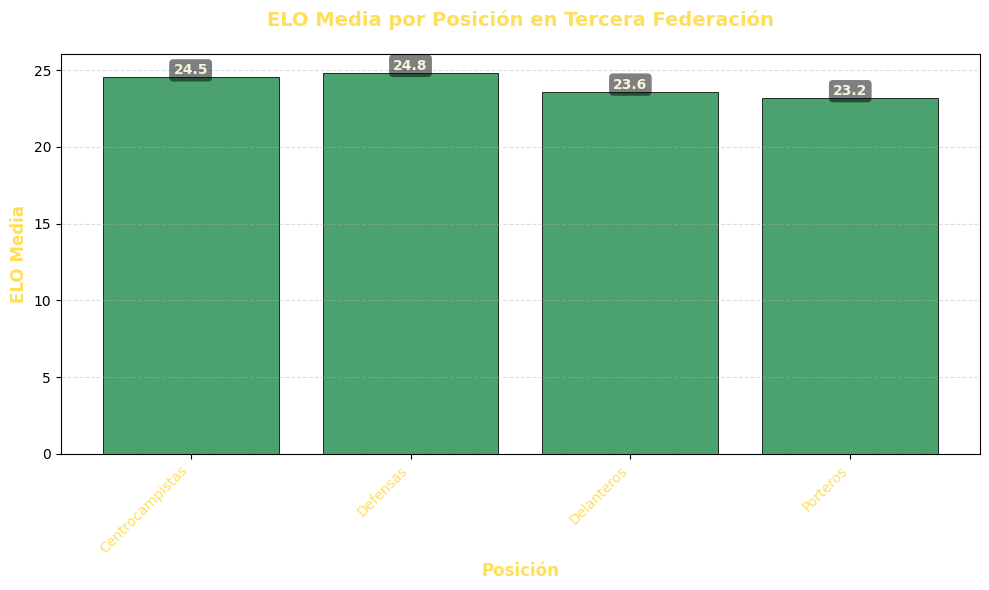

In [637]:
import pandas as pd
import matplotlib.pyplot as plt

# Calcular la edad media por posición
edad_media = tercera_federacion_playes_db.groupby("Posición")["Edad"].mean().reset_index()

# Configuración del estilo
plt.style.use('default')  # Fondo transparente (se ajusta al entorno)
plt.figure(figsize=(10, 6), facecolor='none')  # Fondo transparente

# Definir colores
color_barras = '#1f8b4c'  # Verde deportivo
color_texto = '#f5f5dc'    # Color hueso (beige claro)

# Crear el gráfico de barras
bars = plt.bar(
    edad_media["Posición"], 
    edad_media["Edad"], 
    color=color_barras,
    edgecolor='black',
    linewidth=0.7,
    alpha=0.8
)

# Añadir etiquetas con la edad media encima de cada barra
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2., 
        height, 
        f'{height:.1f}',  # Formato con 1 decimal
        ha='center', 
        va='bottom',
        color=color_texto,
        bbox=dict(
            facecolor='black',  # Fondo del texto (caja)
            alpha=0.5,          # Transparencia del fondo
            edgecolor='none',   # Sin borde
            boxstyle='round,pad=0.3'  # Bordes redondeados
        ),
        fontsize=10,
        fontweight='bold'
    )

# Personalizar ejes y título
plt.xlabel("Posición", fontweight='bold', fontsize=12,color='#ffde59')
plt.ylabel("ELO Media", fontweight='bold', fontsize=12,color='#ffde59')
plt.title("ELO Media por Posición en Tercera Federación", 
          fontweight='bold', 
          fontsize=14,
          pad=20,color='#ffde59')

# Ajustar grid y fondo
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.gca().set_facecolor('none')  # Fondo transparente del área del gráfico

# Rotar etiquetas del eje X si son largas
plt.xticks(rotation=45, ha='right', color='#ffde59')

plt.tight_layout()  # Evita que se corten las etiquetas
plt.show()

In [638]:
Delanteros = Delanteros[['Nombre', 'Posición', 'Equipo', 'Edad', 'Altura_cm', 'Partidos_Jugados', 'Partidos_Titular', 'Goles', 'Asistencias',
                         'porcentaje_gol_por_partido', 'Rating', 'Valor_Mercado', 'Goles_por_partido']]  
Delanteros

,Nombre,Posición,Equipo,Edad,Altura_cm,Partidos_Jugados,Partidos_Titular,Goles,Asistencias,porcentaje_gol_por_partido,Rating,Valor_Mercado,Goles_por_partido
8,Carlitos Monzón,Centrocampistas,AD Parla,25.0,NaN,31,29,1.0,0.0,3.23,46,28K,0.03
9,Escobar,Centrocampistas,AD Parla,26.0,176.0,32,27,4.0,0.0,12.50,44,32K,0.12
10,César Escriba,Centrocampistas,AD Parla,24.0,178.0,23,18,1.0,0.0,4.35,42,26K,0.04
11,Michael,Centrocampistas,AD Parla,26.0,NaN,22,13,0.0,0.0,0.00,41,6K,0.00
12,Rufo,Centrocampistas,AD Parla,23.0,172.0,6,1,0.0,0.0,0.00,38,8K,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9,David Muñoz,Centrocampistas,CUC Villalba,20.0,183.0,26,22,4.0,0.0,15.38,44,50K,0.15
10,Koke San José,Centrocampistas,CUC Villalba,20.0,NaN,24,20,2.0,0.0,8.33,43,66K,0.08
11,Fran Gómez,Centrocampistas,CUC Villalba,21.0,170.0,28,17,1.0,0.0,3.57,42,49K,0.04
12,A. García,Centrocampistas,CUC Villalba,18.0,NaN,19,12,1.0,0.0,5.26,33,3K,0.05


In [639]:
Goleadores_delanteros = Delanteros[Delanteros['Goles'] >= Delanteros['Goles'].mean()].sort_values('Goles', ascending=False)
Goleadores_delanteros.head()

,Nombre,Posición,Equipo,Edad,Altura_cm,Partidos_Jugados,Partidos_Titular,Goles,Asistencias,porcentaje_gol_por_partido,Rating,Valor_Mercado,Goles_por_partido
8,Juan Ybarra,Centrocampistas,Rayo Vallecano B,21.0,NaN,29,29,10.0,0.0,34.48,44,39K,0.34
15,M. Gil,Centrocampistas,Galapagar,35.0,NaN,32,20,10.0,0.0,31.25,46,12K,0.31
11,Guti,Centrocampistas,AD Torrejón CF,24.0,NaN,31,23,10.0,0.0,32.26,39,17K,0.32
10,F. Garcia,Centrocampistas,Cala Pozuelo,NaN,NaN,34,22,9.0,0.0,26.47,47,17K,0.26
11,T. Acosta,Centrocampistas,CD Canillas,28.0,NaN,27,22,8.0,0.0,29.63,45,20K,0.30


In [640]:
Goleadores_delanteros.describe()

,Edad,Altura_cm,Partidos_Jugados,Partidos_Titular,Goles,Asistencias,porcentaje_gol_por_partido,Rating,Goles_por_partido
count,51.000000,19.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000
mean,25.078431,176.526316,28.525424,20.932203,3.779661,0.033898,13.257966,43.101695,0.132203
std,4.939000,6.221543,4.695397,7.752340,2.282375,0.260378,7.325573,4.581428,0.072968
min,19.000000,165.000000,13.000000,1.000000,2.000000,0.000000,6.060000,27.000000,0.060000
25%,21.000000,172.500000,26.500000,17.500000,2.000000,0.000000,7.155000,40.500000,0.070000
50%,24.000000,177.000000,30.000000,22.000000,3.000000,0.000000,11.110000,44.000000,0.110000
75%,28.500000,180.500000,32.000000,27.000000,5.000000,0.000000,15.620000,46.000000,0.160000
max,38.000000,188.000000,34.000000,33.000000,10.000000,2.000000,34.480000,53.000000,0.340000


In [641]:
Delanteros.describe()

,Edad,Altura_cm,Partidos_Jugados,Partidos_Titular,Goles,Asistencias,porcentaje_gol_por_partido,Rating,Goles_por_partido
count,130.000000,52.000000,161.000000,161.000000,161.000000,161.000000,157.000000,161.000000,157.000000
mean,24.523077,176.788462,20.217391,14.006211,1.627329,0.012422,7.151656,40.236025,0.071338
std,4.834013,5.682227,10.902234,10.510410,2.176063,0.157622,10.725993,7.892651,0.107023
min,18.000000,163.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,21.000000,173.000000,11.000000,4.000000,0.000000,0.000000,0.000000,38.000000,0.000000
50%,23.000000,178.000000,24.000000,13.000000,1.000000,0.000000,4.760000,42.000000,0.050000
75%,26.000000,180.250000,30.000000,22.000000,2.000000,0.000000,9.380000,45.000000,0.090000
max,38.000000,188.000000,34.000000,33.000000,10.000000,2.000000,100.000000,53.000000,1.000000


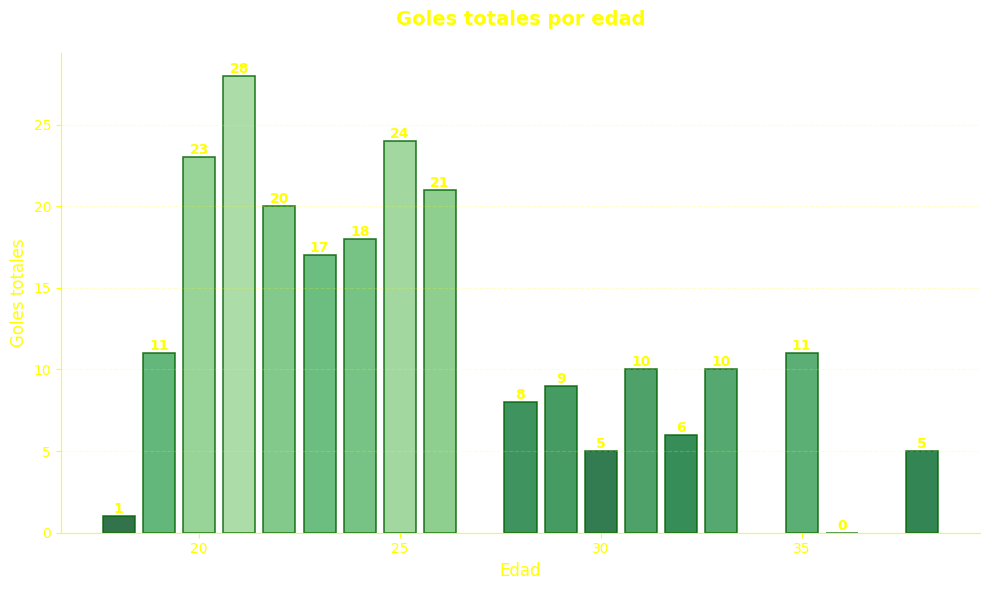

In [642]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Agrupar por edad y sumar los goles
goles_por_edad = Delanteros.groupby("Edad")["Goles"].sum().reset_index()

# Ordenar por goles (de mayor a menor)
goles_por_edad = goles_por_edad.sort_values("Goles", ascending=False)

# Crear el gráfico con fondo transparente
plt.figure(figsize=(10, 6), facecolor='none')  # Fondo transparente
ax = plt.gca()
ax.set_facecolor('none')  # Fondo del área del gráfico transparente

# Crear degradado verde deportivo para las barras
colors = plt.cm.Greens(np.linspace(0.4, 1, len(goles_por_edad)))  # Rango de verdes
bars = plt.bar(goles_por_edad["Edad"], goles_por_edad["Goles"], color=colors, edgecolor='darkgreen', linewidth=1.2, alpha=0.8)

# Personalización con estilo deportivo
plt.title("Goles totales por edad", fontweight="bold", pad=20, color='yellow', fontsize=14)
plt.xlabel("Edad", fontsize=12, color='yellow')
plt.ylabel("Goles totales", fontsize=12, color='yellow')

# Cambiar color de ejes y ticks a amarillo
ax.tick_params(axis='x', colors='yellow')
ax.tick_params(axis='y', colors='yellow')
ax.spines['bottom'].set_color('yellow')
ax.spines['left'].set_color('yellow')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Grid con estilo discreto
plt.grid(axis="y", linestyle="--", alpha=0.2, color='yellow')

# Añadir etiquetas de valor en amarillo
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height,
            f'{int(height)}',
            ha='center', va='bottom',
            color='yellow', fontweight='bold')

plt.tight_layout()
plt.show()

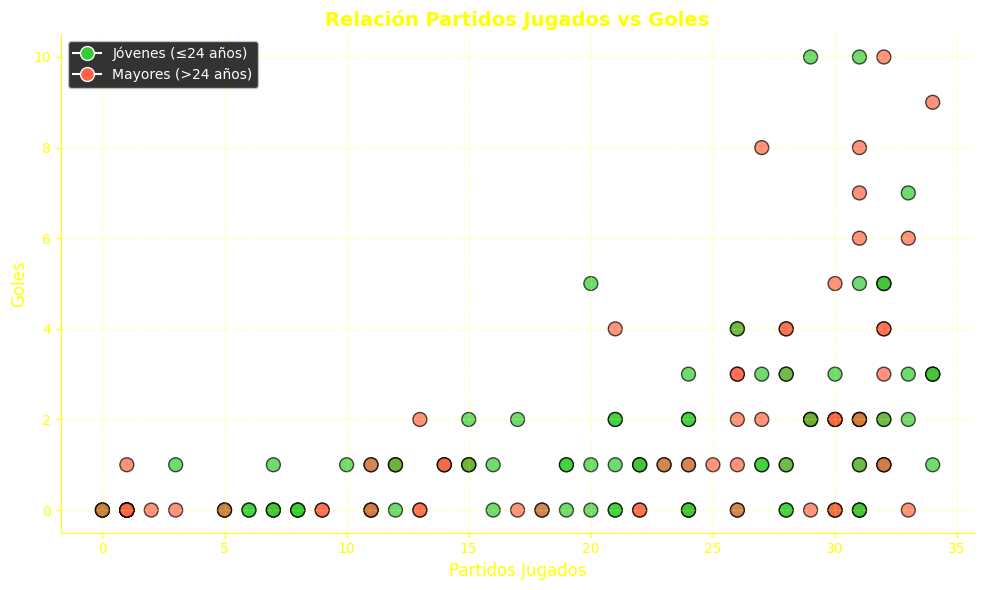

In [643]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Crear el scatter plot con fondo transparente
plt.figure(figsize=(10, 6), facecolor='none')
ax = plt.gca()
ax.set_facecolor('none')

# Definir colores según la edad (verde <=24, rojo >24)
colors = ['limegreen' if edad <= 24 else 'tomato' for edad in Delanteros['Edad']]

# Scatter plot con colores personalizados
scatter = plt.scatter(
    Delanteros['Partidos_Jugados'],  # Eje X
    Delanteros['Goles'],             # Eje Y
    c=colors,                       # Usamos nuestra lista de colores personalizada
    s=100,                          # Tamaño de puntos
    alpha=0.7,                      # Transparencia
    edgecolors='black',             # Borde negro
    linewidths=1                    # Grosor del borde
)

# Añadir etiquetas de nombres
for i in range(len(Delanteros)):
    plt.text(
        Delanteros.iloc[i]['Partidos_Jugados'], 
        Delanteros.iloc[i]['Goles'] + 0.5, 
        Delanteros.iloc[i]['Nombre'],
        ha='center', 
        va='bottom', 
        fontsize=9, 
        color='white'
    )

# Personalización
plt.title("Relación Partidos Jugados vs Goles", fontweight='bold', color='yellow', fontsize=14)
plt.xlabel("Partidos Jugados", color='yellow', fontsize=12)
plt.ylabel("Goles", color='yellow', fontsize=12)

# Color de ejes y ticks
ax.tick_params(colors='yellow')
ax.spines['bottom'].set_color('yellow')
ax.spines['left'].set_color('yellow')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Crear leyenda personalizada para los colores
from matplotlib.lines import Line2D
legend_elements = [
    Line2D([0], [0], marker='o', color='w', label='Jóvenes (≤24 años)',
          markerfacecolor='limegreen', markersize=10),
    Line2D([0], [0], marker='o', color='w', label='Mayores (>24 años)',
          markerfacecolor='tomato', markersize=10)
]
ax.legend(handles=legend_elements, facecolor='black', labelcolor='white')

plt.grid(linestyle='--', alpha=0.3, color='yellow')
plt.tight_layout()
plt.show()

In [644]:
temporada_2025

,Equipo,PTS,PJ,PG,PE,PP,GF,GC,DG,Temporada
0,RSD Alcalá,75,34,23,6,5,68,32,36,2025
1,Rayo Vallecano B,61,34,18,7,9,71,52,19,2025
2,AD Torrejón CF,58,34,17,7,10,55,48,7,2025
3,SAD Villaverde,54,34,14,12,8,52,37,15,2025
4,Galapagar,54,34,14,12,8,45,41,4,2025
5,Las Rozas,54,34,15,9,10,45,42,3,2025
6,CUC Villalba,52,34,14,10,10,44,36,8,2025
7,Leganés B,51,34,13,12,9,58,38,20,2025
8,Alcorcón B,47,34,13,8,13,55,50,5,2025
9,Trival Valderas,46,34,12,10,12,47,47,0,2025


In [645]:
# Primero creamos un diccionario con la posición de cada equipo
posicion_equipos = dict(zip(temporada_2025['Equipo'], temporada_2025.index + 1))  # +1 porque el índice empieza en 0

# Agregamos la columna al DataFrame de jugadores
Delanteros['Posición_Club'] = Delanteros['Equipo'].map(posicion_equipos)

In [646]:
Delanteros.sort_values('Goles', ascending=False).head(10)

,Nombre,Posición,Equipo,Edad,Altura_cm,Partidos_Jugados,Partidos_Titular,Goles,Asistencias,porcentaje_gol_por_partido,Rating,Valor_Mercado,Goles_por_partido,Posición_Club
11,Guti,Centrocampistas,AD Torrejón CF,24.0,NaN,31,23,10.0,0.0,32.26,39,17K,0.32,3
8,Juan Ybarra,Centrocampistas,Rayo Vallecano B,21.0,NaN,29,29,10.0,0.0,34.48,44,39K,0.34,2
15,M. Gil,Centrocampistas,Galapagar,35.0,NaN,32,20,10.0,0.0,31.25,46,12K,0.31,5
10,F. Garcia,Centrocampistas,Cala Pozuelo,NaN,NaN,34,22,9.0,0.0,26.47,47,17K,0.26,15
11,T. Acosta,Centrocampistas,CD Canillas,28.0,NaN,27,22,8.0,0.0,29.63,45,20K,0.30,17
8,Quivira,Centrocampistas,Las Rozas,25.0,177.0,31,30,8.0,2.0,25.81,47,55K,0.26,6
8,H. Solozábal,Centrocampistas,Leganés B,22.0,186.0,33,32,7.0,0.0,21.21,50,183K,0.21,8
14,A. Figueroa,Centrocampistas,Galapagar,25.0,174.0,31,24,7.0,0.0,22.58,45,31K,0.23,5
9,Nacho Maganto,Centrocampistas,México FC,33.0,171.0,31,27,6.0,0.0,19.35,46,33K,0.19,12
8,Migallon,Centrocampistas,México FC,26.0,NaN,33,28,6.0,0.0,18.18,46,42K,0.18,12


In [652]:
# 1. Porcentaje de goles del jugador respecto al total del equipo
# Primero creamos un diccionario con los goles a favor por equipo
goles_equipo = dict(zip(temporada_2025['Equipo'], temporada_2025['GF']))

# Calculamos el aporte
Delanteros['Aporte_Goles'] = (Delanteros['Goles'] / Delanteros['Equipo'].map(goles_equipo)) * 100

# 2. Puntos contribuidos (estimado)
# Asumiendo que cada gol contribuye aproximadamente 0.5 puntos (valor estadístico promedio)
Delanteros['Puntos_Estimados'] = Delanteros['Goles'] * 0.5

# 3. Ratio de rendimiento (goles por partido vs posición del club)
Delanteros['Rendimiento'] = Delanteros['Goles_por_partido'] * (18 - Delanteros['Posición_Club'])  # 18 es el número total de equipos

In [653]:
Delanteros.sort_values('Rendimiento', ascending=False).head(10)

,Nombre,Posición,Equipo,Edad,Altura_cm,Partidos_Jugados,Partidos_Titular,Goles,Asistencias,porcentaje_gol_por_partido,Rating,Valor_Mercado,Goles_por_partido,Posición_Club,Aporte_Goles,Puntos_Estimados,Rendimiento,Rendimiento_ajustado,Aporte_puntos
20,Javier Diz,Centrocampistas,Trival Valderas,NaN,NaN,1,0,1.0,0.0,100.00,26,1K,1.00,10,2.127660,0.5,8.00,10.00,1.0
8,Juan Ybarra,Centrocampistas,Rayo Vallecano B,21.0,NaN,29,29,10.0,0.0,34.48,44,39K,0.34,2,14.084507,5.0,5.44,0.68,10.0
11,Guti,Centrocampistas,AD Torrejón CF,24.0,NaN,31,23,10.0,0.0,32.26,39,17K,0.32,3,18.181818,5.0,4.80,0.96,10.0
15,M. Gil,Centrocampistas,Galapagar,35.0,NaN,32,20,10.0,0.0,31.25,46,12K,0.31,5,22.222222,5.0,4.03,1.55,10.0
8,Quivira,Centrocampistas,Las Rozas,25.0,177.0,31,30,8.0,2.0,25.81,47,55K,0.26,6,17.777778,4.0,3.12,1.56,8.0
14,A. Figueroa,Centrocampistas,Galapagar,25.0,174.0,31,24,7.0,0.0,22.58,45,31K,0.23,5,15.555556,3.5,2.99,1.15,7.0
7,Juanchi,Centrocampistas,Rayo Vallecano B,24.0,NaN,32,32,5.0,0.0,15.62,46,44K,0.16,2,7.042254,2.5,2.56,0.32,5.0
11,Samu Becerra,Centrocampistas,Rayo Vallecano B,19.0,NaN,31,22,5.0,0.0,16.13,37,10K,0.16,2,7.042254,2.5,2.56,0.32,5.0
10,Malote,Centrocampistas,RSD Alcalá,30.0,179.0,28,21,4.0,0.0,14.29,44,39K,0.14,1,5.882353,2.0,2.38,0.14,4.0
8,H. Solozábal,Centrocampistas,Leganés B,22.0,186.0,33,32,7.0,0.0,21.21,50,183K,0.21,8,12.068966,3.5,2.10,1.68,7.0


In [654]:
Delanteros[Delanteros['Edad'] <= 24].sort_values('Rendimiento', ascending=False).head(10)

,Nombre,Posición,Equipo,Edad,Altura_cm,Partidos_Jugados,Partidos_Titular,Goles,Asistencias,porcentaje_gol_por_partido,Rating,Valor_Mercado,Goles_por_partido,Posición_Club,Aporte_Goles,Puntos_Estimados,Rendimiento,Rendimiento_ajustado,Aporte_puntos
8,Juan Ybarra,Centrocampistas,Rayo Vallecano B,21.0,NaN,29,29,10.0,0.0,34.48,44,39K,0.34,2,14.084507,5.0,5.44,0.68,10.0
11,Guti,Centrocampistas,AD Torrejón CF,24.0,NaN,31,23,10.0,0.0,32.26,39,17K,0.32,3,18.181818,5.0,4.80,0.96,10.0
11,Samu Becerra,Centrocampistas,Rayo Vallecano B,19.0,NaN,31,22,5.0,0.0,16.13,37,10K,0.16,2,7.042254,2.5,2.56,0.32,5.0
7,Juanchi,Centrocampistas,Rayo Vallecano B,24.0,NaN,32,32,5.0,0.0,15.62,46,44K,0.16,2,7.042254,2.5,2.56,0.32,5.0
8,H. Solozábal,Centrocampistas,Leganés B,22.0,186.0,33,32,7.0,0.0,21.21,50,183K,0.21,8,12.068966,3.5,2.10,1.68,7.0
14,Jesús Martínez,Centrocampistas,México FC,22.0,171.0,3,2,1.0,0.0,33.33,38,18K,0.33,12,2.857143,0.5,1.98,3.96,1.0
7,J. Castellanos,Centrocampistas,CUC Villalba,19.0,NaN,32,31,5.0,0.0,15.62,43,34K,0.16,7,11.363636,2.5,1.76,1.12,5.0
9,David Muñoz,Centrocampistas,CUC Villalba,20.0,183.0,26,22,4.0,0.0,15.38,44,50K,0.15,7,9.090909,2.0,1.65,1.05,4.0
14,H. Navarro,Centrocampistas,Rayo Vallecano B,22.0,NaN,21,2,2.0,0.0,9.52,43,30K,0.10,2,2.816901,1.0,1.60,0.20,2.0
11,Ángel Blanco,Centrocampistas,RSD Alcalá,21.0,NaN,34,18,3.0,0.0,8.82,45,42K,0.09,1,4.411765,1.5,1.53,0.09,3.0


posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


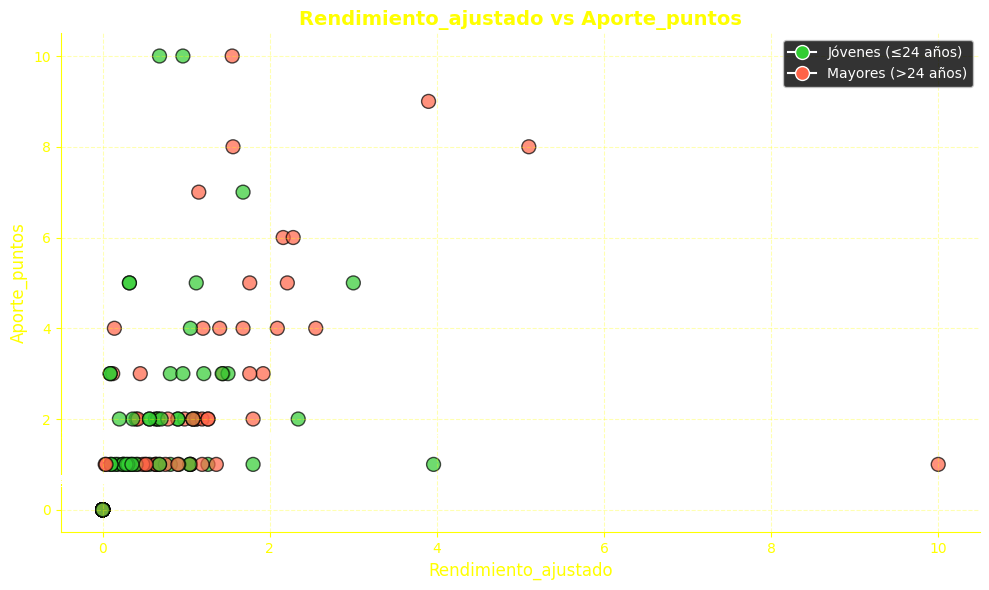

In [655]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Crear el scatter plot con fondo transparente
plt.figure(figsize=(10, 6), facecolor='none')
ax = plt.gca()
ax.set_facecolor('none')

# Definir colores según la edad (verde <=24, rojo >24)
colors = ['limegreen' if edad <= 24 else 'tomato' for edad in Delanteros['Edad']]

# Scatter plot con colores personalizados
scatter = plt.scatter(
    Delanteros['Rendimiento_ajustado'],  # Eje X
    Delanteros['Aporte_puntos'],             # Eje Y
    c=colors,                       # Usamos nuestra lista de colores personalizada
    s=100,                          # Tamaño de puntos
    alpha=0.7,                      # Transparencia
    edgecolors='black',             # Borde negro
    linewidths=1                    # Grosor del borde
)

# Añadir etiquetas de nombres
for i in range(len(Delanteros)):
    plt.text(
        Delanteros.iloc[i]['Rendimiento_ajustado'], 
        Delanteros.iloc[i]['Aporte_puntos'] + 0.5, 
        Delanteros.iloc[i]['Nombre'],
        ha='center', 
        va='bottom', 
        fontsize=9, 
        color='white'
    )

# Personalización
plt.title("Rendimiento_ajustado vs Aporte_puntos", fontweight='bold', color='yellow', fontsize=14)
plt.xlabel("Rendimiento_ajustado", color='yellow', fontsize=12)
plt.ylabel("Aporte_puntos", color='yellow', fontsize=12)

# Color de ejes y ticks
ax.tick_params(colors='yellow')
ax.spines['bottom'].set_color('yellow')
ax.spines['left'].set_color('yellow')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Crear leyenda personalizada para los colores
from matplotlib.lines import Line2D
legend_elements = [
    Line2D([0], [0], marker='o', color='w', label='Jóvenes (≤24 años)',
          markerfacecolor='limegreen', markersize=10),
    Line2D([0], [0], marker='o', color='w', label='Mayores (>24 años)',
          markerfacecolor='tomato', markersize=10)
]
ax.legend(handles=legend_elements, facecolor='black', labelcolor='white')

plt.grid(linestyle='--', alpha=0.3, color='yellow')
plt.tight_layout()
plt.show()

In [656]:
# Opción 1 (simple):
Delanteros['Rendimiento_ajustado'] = Delanteros['Goles_por_partido'] * Delanteros['Posición_Club']

# Opción 2 (más precisa):
Delanteros['Aporte_puntos'] = (Delanteros['Goles'] / Delanteros['Equipo'].map(goles_equipo)) * Delanteros['Equipo'].map(goles_equipo)

In [657]:
Delanteros.sort_values('Rendimiento_ajustado', ascending=False).head()

,Nombre,Posición,Equipo,Edad,Altura_cm,Partidos_Jugados,Partidos_Titular,Goles,Asistencias,porcentaje_gol_por_partido,Rating,Valor_Mercado,Goles_por_partido,Posición_Club,Aporte_Goles,Puntos_Estimados,Rendimiento,Rendimiento_ajustado,Aporte_puntos
20,Javier Diz,Centrocampistas,Trival Valderas,NaN,NaN,1,0,1.0,0.0,100.00,26,1K,1.00,10,2.127660,0.5,8.00,10.00,1.0
11,T. Acosta,Centrocampistas,CD Canillas,28.0,NaN,27,22,8.0,0.0,29.63,45,20K,0.30,17,22.222222,4.0,0.30,5.10,8.0
14,Jesús Martínez,Centrocampistas,México FC,22.0,171.0,3,2,1.0,0.0,33.33,38,18K,0.33,12,2.857143,0.5,1.98,3.96,1.0
10,F. Garcia,Centrocampistas,Cala Pozuelo,NaN,NaN,34,22,9.0,0.0,26.47,47,17K,0.26,15,21.428571,4.5,0.78,3.90,9.0
12,Andrei,Centrocampistas,México FC,23.0,182.0,20,14,5.0,0.0,25.00,42,37K,0.25,12,14.285714,2.5,1.50,3.00,5.0


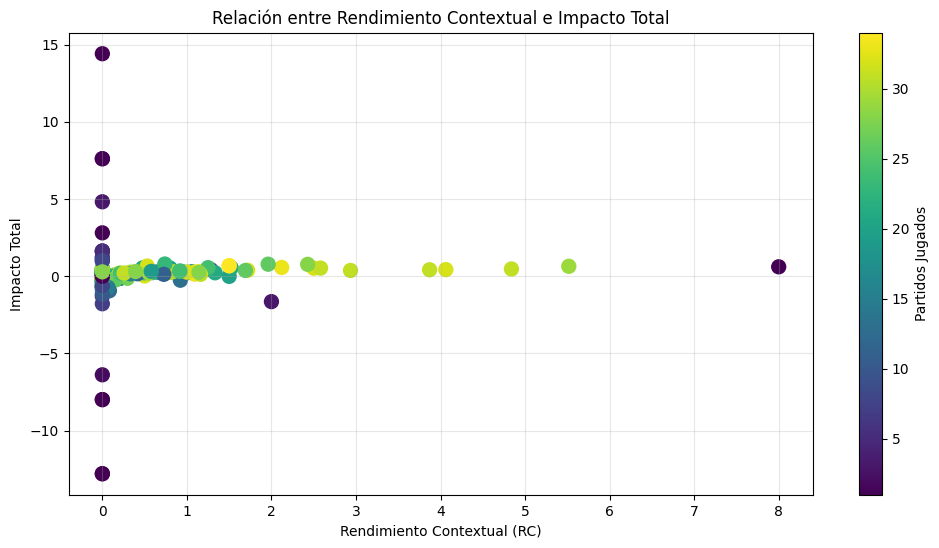

In [658]:
import pandas as pd
import numpy as np


# --- 1. Preparación de datos ---
# Crear diccionarios para mapear datos de equipos
posicion_equipo = dict(zip(temporada_2025['Equipo'], temporada_2025.index + 1))
dg_equipo = dict(zip(temporada_2025['Equipo'], temporada_2025['DG']))
gf_equipo = dict(zip(temporada_2025['Equipo'], temporada_2025['GF']))
pts_equipo = dict(zip(temporada_2025['Equipo'], temporada_2025['PTS']))

# --- 2. Cálculo de nuevas métricas ---
# Asegurar que las asistencias tengan valor 0 si son NaN
Delanteros['Asistencias'] = Delanteros['Asistencias'].fillna(0)

# Métrica 1: Contribución Total Ofensiva (CTO)
Delanteros['CTO'] = (Delanteros['Goles'] + Delanteros['Asistencias']) / Delanteros['Partidos_Jugados']

# Métrica 2: Rendimiento Contextual (RC)
Delanteros['Posición_Club'] = Delanteros['Equipo'].map(posicion_equipo)
Delanteros['RC'] = Delanteros['CTO'] * (18 - Delanteros['Posición_Club'])

# Métrica 3: Impacto Defensivo Relativo (aproximado)
Delanteros['DG_Equipo'] = Delanteros['Equipo'].map(dg_equipo)
Delanteros['IDR'] = Delanteros['DG_Equipo'] / Delanteros['Partidos_Jugados']

# Métrica 4: Valor de Mercado Ajustado (VMA)
# Primero limpiamos el valor de mercado (ej: "33K" → 33000)
Delanteros['Valor_Mercado_Num'] = Delanteros['Valor_Mercado'].str.replace('K', '').astype(float) * 1000
Delanteros['VMA'] = Delanteros['Valor_Mercado_Num'] / (Delanteros['CTO'] + abs(Delanteros['IDR'] + 0.1))  # +0.1 para evitar división por cero

# Métrica 5: Impacto Total (fórmula ponderada)
Delanteros['Impacto_Total'] = (Delanteros['CTO'] * 0.6 + 
                                Delanteros['IDR'] * 0.4 + 
                               (Delanteros['Partidos_Jugados']/34 * 0.2))


# --- 4. Visualización rápida ---
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.scatter(Delanteros['RC'], Delanteros['Impacto_Total'], 
            c=Delanteros['Partidos_Jugados'], cmap='viridis', s=100)
plt.title('Relación entre Rendimiento Contextual e Impacto Total')
plt.xlabel('Rendimiento Contextual (RC)')
plt.ylabel('Impacto Total')
plt.colorbar(label='Partidos Jugados')
plt.grid(alpha=0.3)
plt.show()

In [666]:
pd.set_option('display.max_columns', None)

In [720]:
Mc_10P = Delanteros[(Delanteros['Partidos_Jugados'] > 10) & (Delanteros['Aporte_puntos'] > 2)]
Mc_10P.sort_values('Impacto_Total', ascending=False).head(10)

,Nombre,Posición,Equipo,Edad,Altura_cm,Partidos_Jugados,Partidos_Titular,Goles,Asistencias,porcentaje_gol_por_partido,Rating,Valor_Mercado,Goles_por_partido,Posición_Club,Aporte_Goles,Puntos_Estimados,Rendimiento,Rendimiento_ajustado,Aporte_puntos,CTO,RC,DG_Equipo,IDR,Valor_Mercado_Num,VMA,Impacto_Total
8,Borja Sánchez,Centrocampistas,RSD Alcalá,38.0,179.0,26,25,3.0,0.0,11.54,53,1K,0.12,1,4.411765,1.5,2.04,0.12,3.0,0.115385,1.961538,36,1.384615,1000.0,625.000000,0.776018
10,Malote,Centrocampistas,RSD Alcalá,30.0,179.0,28,21,4.0,0.0,14.29,44,39K,0.14,1,5.882353,2.0,2.38,0.14,4.0,0.142857,2.428571,36,1.285714,39000.0,25514.018692,0.764706
12,Jesús Arribas,Centrocampistas,RSD Alcalá,21.0,NaN,34,27,3.0,0.0,8.82,40,27K,0.09,1,4.411765,1.5,1.53,0.09,3.0,0.088235,1.500000,36,1.058824,27000.0,21650.943396,0.676471
11,Ángel Blanco,Centrocampistas,RSD Alcalá,21.0,NaN,34,18,3.0,0.0,8.82,45,42K,0.09,1,4.411765,1.5,1.53,0.09,3.0,0.088235,1.500000,36,1.058824,42000.0,33679.245283,0.676471
8,Juan Ybarra,Centrocampistas,Rayo Vallecano B,21.0,NaN,29,29,10.0,0.0,34.48,44,39K,0.34,2,14.084507,5.0,5.44,0.68,10.0,0.344828,5.517241,19,0.655172,39000.0,35454.545455,0.639554
8,H. Solozábal,Centrocampistas,Leganés B,22.0,186.0,33,32,7.0,0.0,21.21,50,183K,0.21,8,12.068966,3.5,2.10,1.68,7.0,0.212121,2.121212,20,0.606061,183000.0,199306.930693,0.563815
11,H. Garcia,Centrocampistas,Leganés B,22.0,188.0,24,11,3.0,0.0,12.50,39,34K,0.12,8,5.172414,1.5,1.20,0.96,3.0,0.125000,1.250000,20,0.833333,34000.0,32125.984252,0.549510
11,Samu Becerra,Centrocampistas,Rayo Vallecano B,19.0,NaN,31,22,5.0,0.0,16.13,37,10K,0.16,2,7.042254,2.5,2.56,0.32,5.0,0.161290,2.580645,19,0.612903,10000.0,11439.114391,0.524288
7,Juanchi,Centrocampistas,Rayo Vallecano B,24.0,NaN,32,32,5.0,0.0,15.62,46,44K,0.16,2,7.042254,2.5,2.56,0.32,5.0,0.156250,2.500000,19,0.593750,44000.0,51764.705882,0.519485
11,Guti,Centrocampistas,AD Torrejón CF,24.0,NaN,31,23,10.0,0.0,32.26,39,17K,0.32,3,18.181818,5.0,4.80,0.96,10.0,0.322581,4.838710,7,0.225806,17000.0,26218.905473,0.466224


C:\Users\Legion\AppData\Local\Temp\ipykernel_35172\4102315654.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Mc_10P['Edad'] = Mc_10P['Edad'].fillna(25)


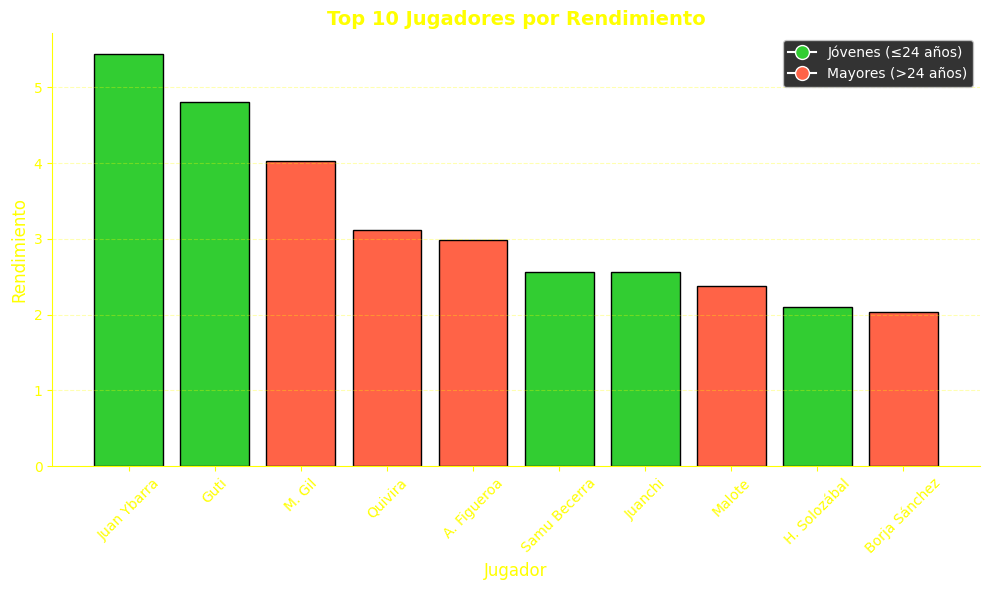

In [722]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.lines import Line2D



# Rellenar edades faltantes con media o un valor predeterminado si se desea
Mc_10P['Edad'] = Mc_10P['Edad'].fillna(25)

# Ordenar por IDR descendente
df_sorted = Mc_10P.sort_values(by='Rendimiento', ascending=False).head(10)

# Estilo de color por edad
colors = ['limegreen' if edad <= 24 else 'tomato' for edad in df_sorted['Edad']]

# Crear gráfico con fondo transparente
plt.figure(figsize=(10, 6), facecolor='none')
ax = plt.gca()
ax.set_facecolor('none')

# Crear gráfico de barras
bars = plt.bar(df_sorted['Nombre'], df_sorted['Rendimiento'], color=colors, edgecolor='black')

# Etiquetas de valores sobre las barras
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.02 if yval >= 0 else yval - 0.05,
             f'{yval:.2f}', ha='center', va='bottom' if yval >= 0 else 'top', fontsize=9, color='white')

# Personalización de estilo
plt.title('Top 10 Jugadores por Rendimiento', fontweight='bold', color='yellow', fontsize=14)
plt.xlabel('Jugador', color='yellow', fontsize=12)
plt.ylabel('Rendimiento', color='yellow', fontsize=12)
ax.tick_params(colors='yellow')
ax.spines['bottom'].set_color('yellow')
ax.spines['left'].set_color('yellow')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Leyenda personalizada
legend_elements = [
    Line2D([0], [0], marker='o', color='w', label='Jóvenes (≤24 años)',
           markerfacecolor='limegreen', markersize=10),
    Line2D([0], [0], marker='o', color='w', label='Mayores (>24 años)',
           markerfacecolor='tomato', markersize=10)
]
ax.legend(handles=legend_elements, facecolor='black', labelcolor='white')

# Cuadrícula ligera
plt.grid(axis='y', linestyle='--', alpha=0.3, color='yellow')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


C:\Users\Legion\AppData\Local\Temp\ipykernel_35172\1734849245.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Mc_10P['Edad'] = Mc_10P['Edad'].fillna(25)  # Opcional: imputar edad si falta


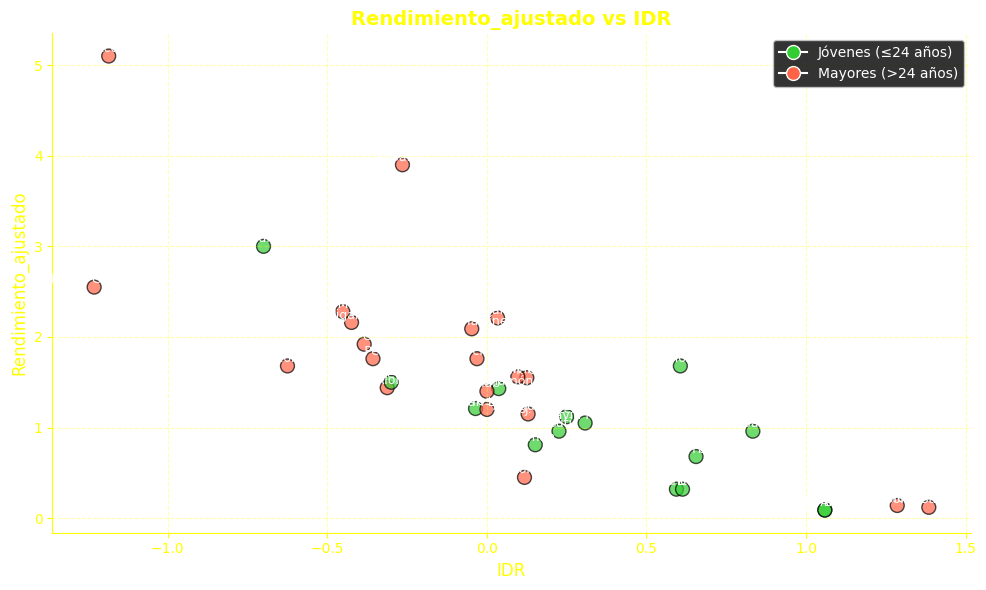

In [726]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D



Mc_10P['Edad'] = Mc_10P['Edad'].fillna(25)  # Opcional: imputar edad si falta

# Estilo de color por edad
colors = ['limegreen' if edad <= 24 else 'tomato' for edad in Mc_10P['Edad']]

# Crear scatter plot
plt.figure(figsize=(10, 6), facecolor='none')
ax = plt.gca()
ax.set_facecolor('none')

# Dibujar puntos
scatter = plt.scatter(
    Mc_10P['IDR'],
    Mc_10P['Rendimiento_ajustado'],
    c=colors,
    s=100,
    alpha=0.7,
    edgecolors='black',
    linewidths=1
)

# Etiquetas de nombres
for i in range(len(Mc_10P)):
    plt.text(
        Mc_10P.iloc[i]['IDR'],
        Mc_10P.iloc[i]['Rendimiento_ajustado'] + 0.01,
        Mc_10P.iloc[i]['Nombre'],
        ha='center',
        va='bottom',
        fontsize=9,
        color='white'
    )

# Personalización de estilo
plt.title("Rendimiento_ajustado vs IDR", fontweight='bold', color='yellow', fontsize=14)
plt.xlabel("IDR", color='yellow', fontsize=12)
plt.ylabel("Rendimiento_ajustado", color='yellow', fontsize=12)

# Ejes y cuadrícula
ax.tick_params(colors='yellow')
ax.spines['bottom'].set_color('yellow')
ax.spines['left'].set_color('yellow')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.grid(linestyle='--', alpha=0.3, color='yellow')

# Leyenda por edad
legend_elements = [
    Line2D([0], [0], marker='o', color='w', label='Jóvenes (≤24 años)',
           markerfacecolor='limegreen', markersize=10),
    Line2D([0], [0], marker='o', color='w', label='Mayores (>24 años)',
           markerfacecolor='tomato', markersize=10)
]
ax.legend(handles=legend_elements, facecolor='black', labelcolor='white')

plt.tight_layout()
plt.show()


In [727]:
Mc_10P.Equipo.unique()

array(['AD Parla', 'AD Torrejón CF', 'Alcorcón B', 'Aravaca',
       'Cala Pozuelo', 'CD Canillas', 'CDF Tres Cantos', 'Galapagar',
       'Las Rozas', 'Leganés B', 'México FC', 'Rayo Vallecano B',
       'RCD Carabanchel', 'RSD Alcalá', 'Trival Valderas', 'CUC Villalba'],
      dtype=object)

In [728]:
Mc_10P[Mc_10P['Equipo'] == 'México FC']

,Nombre,Posición,Equipo,Edad,Altura_cm,Partidos_Jugados,Partidos_Titular,Goles,Asistencias,porcentaje_gol_por_partido,Rating,Valor_Mercado,Goles_por_partido,Posición_Club,Aporte_Goles,Puntos_Estimados,Rendimiento,Rendimiento_ajustado,Aporte_puntos,CTO,RC,DG_Equipo,IDR,Valor_Mercado_Num,VMA,Impacto_Total
8,Migallon,Centrocampistas,México FC,26.0,NaN,33,28,6.0,0.0,18.18,46,42K,0.18,12,17.142857,3.0,1.08,2.16,6.0,0.181818,1.090909,-14,-0.424242,42000.0,82994.011976,0.133512
9,Nacho Maganto,Centrocampistas,México FC,33.0,171.0,31,27,6.0,0.0,19.35,46,33K,0.19,12,17.142857,3.0,1.14,2.28,6.0,0.193548,1.161290,-14,-0.451613,33000.0,60532.544379,0.117837
12,Andrei,Centrocampistas,México FC,23.0,182.0,20,14,5.0,0.0,25.00,42,37K,0.25,12,14.285714,2.5,1.50,3.00,5.0,0.250000,1.500000,-14,-0.700000,37000.0,43529.411765,-0.012353


In [729]:
tercera_federacion_playes_db

,Nombre,Posición,Equipo,Edad,Altura_cm,Partidos_Jugados,Partidos_Titular,Goles,Asistencias,porcentaje_gol_por_partido,Rating,Valor_Mercado
0,Raúl Espinosa,Defensas,AD Parla,29.0,177.0,3,3,0.0,0.0,0.00,50,73K
1,Rodrigo Nunes,Defensas,AD Parla,31.0,191.0,22,21,3.0,0.0,13.64,46,19K
2,A. Moreno,Defensas,AD Parla,NaN,NaN,14,11,1.0,0.0,7.14,41,11K
3,D. Chica,Defensas,AD Parla,21.0,182.0,28,26,0.0,0.0,0.00,39,13K
4,Javi Arce,Defensas,AD Parla,20.0,180.0,19,18,1.0,0.0,5.26,38,6K
...,...,...,...,...,...,...,...,...,...,...,...,...
15,Javi Alonso,Delanteros,CUC Villalba,20.0,NaN,33,23,8.0,0.0,24.24,48,44K
16,David Vilán,Delanteros,CUC Villalba,22.0,185.0,23,11,2.0,0.0,8.70,48,85K
17,Abraham José,Delanteros,CUC Villalba,21.0,179.0,31,17,7.0,0.0,22.58,43,68K
18,A. Bensaad,Delanteros,CUC Villalba,19.0,184.0,27,11,2.0,0.0,7.41,40,17K


# Estructura de Departamento de Scouting 

Simulando que somos un equipo de Segunda/Primera Federación - creamos un departamento de Scouting con bajos recurso. 

* Un análista de video (Análisis individual y colectivo de los jugadores - identificar si es un jugador que encaja en el sistema)
* Un análista de datos (Creación de bases de datos, Webscraping y aplicación de tecnología )

El análista de datos se encargara de crear la base de datos de las ligas de (Tercera, segunda, primera federación asi como la base de datos de los juveniles de división de honor de dos a tres grupos.) Con el uso de los datos crearemos modelos de identificación de datalento, para poder facilitar y dirrigir la busqueda de los jugadores más facil. Con esto buscamos tener una 

In [815]:
from selenium import webdriver
from selenium.webdriver.chrome.options import Options
import pandas as pd

# Configurar Selenium (modo headless para ejecución en segundo plano)
chrome_options = Options()
chrome_options.add_argument("--headless")  # Elimina esta línea si quieres ver el navegador
chrome_options.add_argument("user-agent=Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/119.0.0.0 Safari/537.36")

url = "https://es.besoccer.com/equipo/plantilla/real-madrid-juvenil"

try:
    # Inicializar el navegador
    driver = webdriver.Chrome(options=chrome_options)
    driver.get(url)
    
    # Esperar brevemente para asegurar la carga (opcional)
    driver.implicitly_wait(5)
    
    # Extraer todas las tablas de la página
    dfs = pd.read_html(driver.page_source)
    
    if not dfs:
        print("No se encontraron tablas en la página.")
    else:
        # Mostrar cada DataFrame con mejor formato
        for i, df in enumerate(dfs, 1):
            print(f"\n=== Tabla {i} ({len(df)} filas × {len(df.columns)} columnas) ===")
            print(df.to_string(index=False))  # Mejor formato sin índices
            print("\n" + "="*50)
            
            # Guardar en CSV si lo deseas (opcional)
    
finally:
    driver.quit()

# Ahora puedes manipular los DataFrames fuera del bloque Selenium
# Ejemplo: Acceder a la primera tabla
if 'dfs' in locals() and len(dfs) > 0:
    primera_tabla = dfs[0]
    print("\nPrimera tabla lista para análisis:")
    print(primera_tabla.head())

C:\Users\Legion\AppData\Local\Temp\ipykernel_35172\288545819.py:21: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  dfs = pd.read_html(driver.page_source)



=== Tabla 1 (48 filas × 17 columnas) ===
       Porteros      Porteros.1      Porteros.2  Unnamed: 3 PJ PT  Unnamed: 6  Unnamed: 7  Unnamed: 8 Edad  cm    € rating Temp. PJ.1  Unnamed: 15  Unnamed: 16
              1             NaN     Á. González         NaN 24 24        12.0         0.0         2.0   18   -  41K     40     2   34         16.0          2.0
             31             NaN     I. Voloshyn         NaN  0  0         0.0         0.0         0.0   18 202   9K     37     1    0          0.0          0.0
             31             NaN  Javier Navarro         NaN  4  4         1.0         0.0         0.0   18   -  11K     34     2    4          1.0          0.0
             31             NaN        A. Gómez         NaN  0  0         0.0         0.0         0.0   17   -   1K     26     1    0          0.0          0.0
             13             NaN       D. Arroyo         NaN  2  2         2.0         0.0         0.0   19   -   5K     32     2    2          2.0          0.

In [821]:
from selenium import webdriver
from selenium.webdriver.chrome.options import Options
import pandas as pd

def extraer_tablas_besoccer(url, headless=True, guardar_csv=False, verbose=True):
    """
    Extrae todas las tablas de una página de BeSoccer usando Selenium y Pandas.

    Parámetros:
        url (str): URL de la página a procesar.
        headless (bool): Si se ejecuta el navegador en segundo plano (sin interfaz).
        guardar_csv (bool): Si se guarda cada tabla como un archivo CSV.
        verbose (bool): Si se imprimen las tablas por pantalla.

    Retorna:
        list[pd.DataFrame]: Lista de DataFrames con las tablas extraídas.
    """
    chrome_options = Options()
    if headless:
        chrome_options.add_argument("--headless")
    chrome_options.add_argument("user-agent=Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/119.0.0.0 Safari/537.36")

    try:
        driver = webdriver.Chrome(options=chrome_options)
        driver.get(url)
        driver.implicitly_wait(5)  # Espera a que se cargue la página

        dfs = pd.read_html(driver.page_source)

        if not dfs:
            print("⚠️ No se encontraron tablas en la página.")
            return []
        else:
            for i, df in enumerate(dfs, 1):
                if verbose:
                    print(f"\n=== Tabla {i} ({len(df)} filas × {len(df.columns)} columnas) ===")
                    print(df.to_string(index=False))
                    print("=" * 50)
                if guardar_csv:
                    nombre_archivo = f"tabla_{i}.csv"
                    df.to_csv(nombre_archivo, index=False)
                    if verbose:
                        print(f"📁 Tabla {i} guardada como {nombre_archivo}")
        return dfs

    finally:
        driver.quit()


In [817]:
import pandas as pd

def limpiar_dataframe(df):
    # Renombrar columnas (17 nombres)
    df.columns = [
        'Numero', 'Posicion_raw', 'Nombre', 'Extra1', 'Partidos_jugados', 'Partidos_titular',
        'Goles', 'Asistencias', 'Tarjetas_amarillas', 'Edad', 'Altura',
        'Valor_Mercado', 'ELO', 'Temporadas', 'Partidos_totales', 'Goles_totales',
        'Asistencias_totales'
    ]

    # Crear columna de posición final
    df['Posicion'] = None

    # Posiciones válidas
    posiciones_validas = ['Porteros', 'Defensas', 'Centrocampistas', 'Delanteros']

    # Asignar posición a cada jugador según la última etiqueta encontrada
    posicion_actual = 'Porteros'  # El primer bloque es de porteros
    for i, row in df.iterrows():
        if row['Numero'] in posiciones_validas:
            posicion_actual = row['Numero']
        else:
            df.at[i, 'Posicion'] = posicion_actual

    # Eliminar filas que contienen etiquetas de posición
    df = df[~df['Numero'].isin(posiciones_validas)].copy()

    # Eliminar columnas innecesarias
    df.drop(columns=['Extra1', 'Posicion_raw'], inplace=True)

    # Convertir valores monetarios (como "41K") a enteros
    def convertir_valor(valor):
        if isinstance(valor, str):
            valor = valor.strip().upper().replace('€', '')
            if valor.endswith('K'):
                return int(float(valor[:-1]) * 1000)
            elif valor.endswith('M'):
                return int(float(valor[:-1]) * 1_000_000)
            elif valor == '-':
                return None
        return pd.to_numeric(valor, errors='coerce')

    df['Valor_Mercado'] = df['Valor_Mercado'].apply(convertir_valor)

    # Convertir columnas numéricas
    columnas_a_numericas = [
        'Numero', 'Partidos_jugados', 'Partidos_titular', 'Goles', 'Asistencias', 'Tarjetas_amarillas',
        'Edad', 'Altura', 'Valor_Mercado', 'ELO', 'Temporadas', 'Partidos_totales', 'Goles_totales', 'Asistencias_totales'
    ]

    for col in columnas_a_numericas:
        df[col] = pd.to_numeric(df[col], errors='coerce')

    # Resetear índice
    df = df.reset_index(drop=True)

    return df


In [885]:
# Url de equipos 

valladolid_url = 'https://es.besoccer.com/equipo/plantilla/real-valladolid-juvenil'
rayp_vallecano_url = 'https://es.besoccer.com/equipo/plantilla/rayo-vallecano-juvenil'
union_adarve_url = 'https://es.besoccer.com/equipo/plantilla/union-adarve-juvenil'
diocesano_url = 'https://es.besoccer.com/equipo/plantilla/cd-diocesano'
burgos_url = 'https://es.besoccer.com/equipo/plantilla/burgos-cf-juvenil'
las_rozas_u19_url = 'https://es.besoccer.com/equipo/plantilla/rozas-juvenil'
villanovense_url = 'https://es.besoccer.com/equipo/plantilla/ud-cruz-villanovense-juvenil'
alcobendas_url = 'https://es.besoccer.com/equipo/plantilla/rayo-ciudad-alcobendas-a-juvenil'
mostoles_u19_url = 'https://es.besoccer.com/equipo/plantilla/cd-mostoles-urjc-f-juvenil'
alcorcon_u19_url = 'https://es.besoccer.com/equipo/plantilla/ad-alcorcon-juvenil'
fuenlabrada_u19_url = 'https://es.besoccer.com/equipo/plantilla/cf-fuenlabrada-juvenil'

In [886]:
url = fuenlabrada_u19_url
tablas = extraer_tablas_besoccer(url, headless=True, guardar_csv=False, verbose=True)

# Acceder a la primera tabla si existe
if tablas:
    primera_tabla = tablas[0]
    print("\nPrimera tabla lista para análisis:")
    print(primera_tabla.head())


C:\Users\Legion\AppData\Local\Temp\ipykernel_35172\2648404072.py:28: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  dfs = pd.read_html(driver.page_source)



=== Tabla 1 (39 filas × 17 columnas) ===
       Porteros      Porteros.1      Porteros.2  Unnamed: 3 PJ PT  Unnamed: 6  Unnamed: 7  Unnamed: 8 Edad  cm  € rating Temp. PJ.1  Unnamed: 15  Unnamed: 16
             13             NaN    A. Corellano         NaN 10 10        19.0         0.0         2.0   19   - 1K     30     1   10         19.0          2.0
              1             NaN     A. Barovero         NaN  9  9        17.0         0.0         0.0    -   - 1K     27     1    9         17.0          0.0
              1             NaN       H. Valera         NaN  8  6        15.0         0.0         2.0   19   - 1K     35     1    8         15.0          2.0
              1             NaN     E. Cevallos         NaN  3  3        10.0         0.0         0.0   19   - 1K     33     1    3         10.0          0.0
              1             NaN       P. Caldas         NaN  0  0         0.0         0.0         0.0    -   - 1K     27     1    0          0.0          0.0
          

In [887]:
df_limpio = limpiar_dataframe(primera_tabla)
df_limpio

,Numero,Nombre,Partidos_jugados,Partidos_titular,Goles,Asistencias,Tarjetas_amarillas,Edad,Altura,Valor_Mercado,ELO,Temporadas,Partidos_totales,Goles_totales,Asistencias_totales,Posicion
0,13,A. Corellano,10,10,19.0,0.0,2.0,19.0,NaN,1000,30,1,10,19.0,2.0,Porteros
1,1,A. Barovero,9,9,17.0,0.0,0.0,NaN,NaN,1000,27,1,9,17.0,0.0,Porteros
2,1,H. Valera,8,6,15.0,0.0,2.0,19.0,NaN,1000,35,1,8,15.0,2.0,Porteros
3,1,E. Cevallos,3,3,10.0,0.0,0.0,19.0,NaN,1000,33,1,3,10.0,0.0,Porteros
4,1,P. Caldas,0,0,0.0,0.0,0.0,NaN,NaN,1000,27,1,0,0.0,0.0,Porteros
5,13,N. De La Torre,3,2,4.0,0.0,0.0,18.0,NaN,1000,31,2,3,4.0,0.0,Porteros
6,13,M. Aranda,0,0,0.0,0.0,0.0,NaN,NaN,1000,26,1,0,0.0,0.0,Porteros
7,30,Angulo,27,27,2.0,0.0,4.0,17.0,193.0,1000,31,1,27,2.0,5.0,Defensas
8,10,D. Ortega,23,16,1.0,0.0,6.0,19.0,NaN,2000,37,1,23,1.0,6.0,Defensas
9,9,A. De Avila,24,15,5.0,0.0,2.0,NaN,NaN,1000,35,1,24,5.0,2.0,Defensas


In [888]:
df_limpio.sort_values('Goles', ascending=False).head()


,Numero,Nombre,Partidos_jugados,Partidos_titular,Goles,Asistencias,Tarjetas_amarillas,Edad,Altura,Valor_Mercado,ELO,Temporadas,Partidos_totales,Goles_totales,Asistencias_totales,Posicion
0,13,A. Corellano,10,10,19.0,0.0,2.0,19.0,NaN,1000,30,1,10,19.0,2.0,Porteros
1,1,A. Barovero,9,9,17.0,0.0,0.0,NaN,NaN,1000,27,1,9,17.0,0.0,Porteros
2,1,H. Valera,8,6,15.0,0.0,2.0,19.0,NaN,1000,35,1,8,15.0,2.0,Porteros
3,1,E. Cevallos,3,3,10.0,0.0,0.0,19.0,NaN,1000,33,1,3,10.0,0.0,Porteros
9,9,A. De Avila,24,15,5.0,0.0,2.0,NaN,NaN,1000,35,1,24,5.0,2.0,Defensas


In [889]:
df_limpio.to_csv("D:\\Mexico FC\\Temporada_2025_DH\\Fuenlabrada U19_DH.csv", index=False)

In [ ]:
import requests
import pandas as pd
from bs4 import BeautifulSoup

url = "https://es.besoccer.com/competicion/clasificacion/division_honor_juvenil/2025/grupo5"

try:
    # Hacer la petición a la URL
    response = requests.get(url)
    response.raise_for_status()  # Verificar que la petición fue exitosa

    # Usar pandas para extraer las tablas del HTML
    dfs = pd.read_html(response.text)  # Esto devuelve una lista de DataFrames
    
    if dfs:
        # Seleccionar la primera tabla (o la que corresponda)
        df = dfs[0]  # Si hay varias tablas, prueba dfs[1], dfs[2], etc.
        
        # Mostrar el DataFrame
        print(df)
        
    else:
        print("No se encontraron tablas en la página.")

except requests.exceptions.RequestException as e:
    print(f"Error al acceder a la URL: {e}")

In [ ]:
import pandas as pd
import re

def limpiar_df_clasificacion(df):
    """
    Limpia el DataFrame de clasificación de fútbol:
    1. Elimina columnas innecesarias
    2. Renombra la columna de equipos
    3. Limpia los nombres de los equipos
    """
    # Hacer una copia para no modificar el original
    df_limpio = df.copy()
    
    # 1. Eliminar columnas no necesarias
    columnas_a_eliminar = ['Unnamed: 0', 'Unnamed: 1']
    for col in columnas_a_eliminar:
        if col in df_limpio.columns:
            df_limpio.drop(col, axis=1, inplace=True)
    
    # 2. Renombrar la columna de equipos
    if 'Unnamed: 2' in df_limpio.columns:
        df_limpio = df_limpio.rename(columns={'Unnamed: 2': 'Equipo'})
    
    # 3. Limpiar los nombres de los equipos (eliminar letras V, E, D después del nombre)
    if 'Equipo' in df_limpio.columns:
        df_limpio['Equipo'] = df_limpio['Equipo'].apply(lambda x: re.sub(r'[VED\s]+$', '', str(x)).strip())
    
    return df_limpio

---
Concat de la DB División de Honor Grupo 5 

In [1113]:
Alcorcon_plantilla = pd.read_csv("D:\Mexico FC\Temporada_2025_DH\Alcorcón U19_DH.csv")
AtlMadrid_plantilla = pd.read_csv("D:\Mexico FC\Temporada_2025_DH\Atletico_de_Madrid_DH.csv")
Burgos_u19_plantilla = pd.read_csv('D:\Mexico FC\Temporada_2025_DH\Burgos U19_DH.csv')
diocesano_u19_plantilla = pd.read_csv('D:\Mexico FC\Temporada_2025_DH\CD Diocesano U19_DH.csv')
mostoles_u19_plantilla = pd.read_csv('D:\Mexico FC\Temporada_2025_DH\CD Móstoles U19_DH.csv')
fuenlabrada_u19_plantilla = pd.read_csv('D:\Mexico FC\Temporada_2025_DH\Fuenlabrada U19_DH.csv')
getafe_u19_plantilla = pd.read_csv('D:\Mexico FC\Temporada_2025_DH\Getafe U19_DH.csv')
villanovense_u19_plantilla = pd.read_csv('D:\Mexico FC\Temporada_2025_DH\La Cruz Villanovense U19DH.csv')
las_rozas_u19_plantilla = pd.read_csv('D:\Mexico FC\Temporada_2025_DH\Las Rozas CF U19_DH.csv')
leganes_u19_plantilla = pd.read_csv('D:\Mexico FC\Temporada_2025_DH\Leganés_U19_DH.csv')
rayo_alcobendas_u19_plantilla = pd.read_csv('D:\Mexico FC\Temporada_2025_DH\Rayo C. Alcobendas U19_DH.csv')
rayo_majadahonda_u19_plantilla = pd.read_csv('D:\Mexico FC\Temporada_2025_DH\Rayo Majadahonda_DH.csv')
rayo_vallecano_u19_plantilla = pd.read_csv('D:\Mexico FC\Temporada_2025_DH\Rayo Vallecano U19_DH.csv')
real_madrid_u19_plantilla = pd.read_csv('D:\Mexico FC\Temporada_2025_DH\Real Madrid U19_DH.csv')
adarve_u19_plantilla = pd.read_csv('D:\\Mexico FC\\Temporada_2025_DH\\Unión Adarve U19_DH.csv')
valladolid_u19_plantilla = pd.read_csv('D:\Mexico FC\Temporada_2025_DH\Valladolid U19_DH.csv')

Alcorcon_plantilla['Equipo'] = 'Alcorcón U19'
AtlMadrid_plantilla['Equipo'] = 'Atlético U19'
Burgos_u19_plantilla['Equipo'] = 'Burgos U19'
diocesano_u19_plantilla['Equipo'] = 'CD Diocesano U19'
mostoles_u19_plantilla['Equipo'] = 'CD Móstoles U19'
fuenlabrada_u19_plantilla['Equipo'] = 'Fuenlabrada U19'
getafe_u19_plantilla['Equipo'] = 'Getafe U19'
villanovense_u19_plantilla['Equipo'] = 'La Cruz Villanovense U19'
las_rozas_u19_plantilla['Equipo'] = 'Las Rozas CF U19'
leganes_u19_plantilla['Equipo'] = 'Leganés U19'
rayo_alcobendas_u19_plantilla['Equipo'] = 'Rayo C. Alcobendas U19'
rayo_majadahonda_u19_plantilla['Equipo'] = 'Rayo Majadahonda U19'
rayo_vallecano_u19_plantilla['Equipo'] = 'Rayo Vallecano U19'
real_madrid_u19_plantilla['Equipo'] = 'Real Madrid U19'
adarve_u19_plantilla['Equipo'] = 'Unión Adarve U19'
valladolid_u19_plantilla['Equipo'] = 'Valladolid U19'

In [1114]:
dh_grupo_5 = pd.concat([Alcorcon_plantilla,
                        AtlMadrid_plantilla,
                        Burgos_u19_plantilla,
                        diocesano_u19_plantilla,
                        mostoles_u19_plantilla,
                        fuenlabrada_u19_plantilla,
                        getafe_u19_plantilla,
                        villanovense_u19_plantilla,
                        las_rozas_u19_plantilla,
                        leganes_u19_plantilla,
                        rayo_alcobendas_u19_plantilla,
                        rayo_majadahonda_u19_plantilla,
                        rayo_vallecano_u19_plantilla,
                        real_madrid_u19_plantilla,
                        adarve_u19_plantilla,
                        valladolid_u19_plantilla
                        ])

Grupo_5_DH_CM = dh_grupo_5[['Numero', 'Nombre', 'Posicion', 'Equipo', 'Partidos_jugados', 'Partidos_titular', 'Goles', 'Asistencias', 'Tarjetas_amarillas', 'Edad',
                   'Altura', 'ELO']]


In [1115]:
df_clasificacion_dh_g5 = limpiar_df_clasificacion(df)
#df_limpio.to_csv("D:\Mexico FC\Data_clasificación\clasificació_2022.csv", index=False)

In [1143]:
import pandas as pd
import numpy as np

# --------------------------
# 1. PREPARACIÓN DE DATOS
# --------------------------

# Crear diccionarios para mapear datos de equipos desde df_clasificacion_dh_g5
equipo_stats = {
    'Posición': dict(zip(df_clasificacion_dh_g5['Equipo'], df_clasificacion_dh_g5.index + 1)),
    'GF': dict(zip(df_clasificacion_dh_g5['Equipo'], df_clasificacion_dh_g5['GF'])),
    'DG': dict(zip(df_clasificacion_dh_g5['Equipo'], df_clasificacion_dh_g5['DG'])),
    'PTS': dict(zip(df_clasificacion_dh_g5['Equipo'], df_clasificacion_dh_g5['PTS']))
}

# --------------------------
# 2. LIMPIEZA DE DATOS
# --------------------------

# Filtrar jugadores con al menos 1 partido jugado
Grupo_5_DH_CM = Grupo_5_DH_CM[Grupo_5_DH_CM['Partidos_jugados'] > 0].copy()

# Rellenar valores nulos en asistencias
Grupo_5_DH_CM['Asistencias'] = Grupo_5_DH_CM['Asistencias'].fillna(0)

# --------------------------
# 3. CÁLCULO DE MÉTRICAS BÁSICAS
# --------------------------

# Goles por partido (evitando división por cero ya que filtramos)
Grupo_5_DH_CM['Goles_por_partido'] = (Grupo_5_DH_CM['Goles'] / Grupo_5_DH_CM['Partidos_jugados']).round(2)

# Asistencias por partido
Grupo_5_DH_CM['Asistencias_por_partido'] = (Grupo_5_DH_CM['Asistencias'] / Grupo_5_DH_CM['Partidos_jugados']).round(2)

# Participación en goles (G + A)
Grupo_5_DH_CM['Participacion_goles'] = Grupo_5_DH_CM['Goles'] + Grupo_5_DH_CM['Asistencias']

# Participación en goles por partido
Grupo_5_DH_CM['Participacion_por_partido'] = (Grupo_5_DH_CM['Participacion_goles'] / Grupo_5_DH_CM['Partidos_jugados']).round(2)

# --------------------------
# 4. MÉTRICAS RELATIVAS AL EQUIPO
# --------------------------

# Posición del equipo en la liga
Grupo_5_DH_CM['Posición_Club'] = Grupo_5_DH_CM['Equipo'].map(equipo_stats['Posición'])

# Aporte porcentual a los goles del equipo
Grupo_5_DH_CM['Aporte_Goles'] = (Grupo_5_DH_CM['Goles'] / Grupo_5_DH_CM['Equipo'].map(equipo_stats['GF']) * 100).round(2)

# Aporte porcentual a los puntos del equipo (asumiendo 0.33 puntos por gol)
Grupo_5_DH_CM['Aporte_Puntos'] = (Grupo_5_DH_CM['Goles'] * 0.33 / Grupo_5_DH_CM['Equipo'].map(equipo_stats['PTS']) * 100).round(2)

# --------------------------
# 5. MÉTRICAS AVANZADAS
# --------------------------

# Rendimiento Contextual (RC): Pondera la participación en goles con la posición del equipo
# Equipos mejores (posición baja) reciben menor ponderación
Grupo_5_DH_CM['RC'] = (Grupo_5_DH_CM['Participacion_por_partido'] * 
                       (18 - Grupo_5_DH_CM['Posición_Club']) / 17).round(2)  # Normalizado a [0-1]

# Impacto Defensivo Relativo (IDR): Basado en la diferencia de goles del equipo
Grupo_5_DH_CM['IDR'] = (Grupo_5_DH_CM['Equipo'].map(equipo_stats['DG']) / 
                        Grupo_5_DH_CM['Partidos_jugados']).round(2)

# --------------------------
# 6. MÉTRICA COMPUESTA - SCORE DE IMPACTO
# --------------------------

# Pesos configurables para la métrica compuesta
pesos = {
    'ofensivo': 0.6,    # Participación en goles
    'defensivo': 0.3,    # Impacto defensivo
    'consistencia': 0.1  # Partidos jugados (regularidad)
}

# Normalizar componentes
max_partidos = Grupo_5_DH_CM['Partidos_jugados'].max()
Grupo_5_DH_CM['Impacto_Total'] = (
    pesos['ofensivo'] * Grupo_5_DH_CM['Participacion_por_partido'] +
    pesos['defensivo'] * (Grupo_5_DH_CM['IDR'] / Grupo_5_DH_CM['IDR'].abs().max()) +
    pesos['consistencia'] * (Grupo_5_DH_CM['Partidos_jugados'] / max_partidos)
).round(3)

# --------------------------
# 7. ANÁLISIS POR POSICIÓN
# --------------------------

G5_jugadores_campo = Grupo_5_DH_CM[Grupo_5_DH_CM['Posicion'] != 'Porteros'].sort_values('RC', ascending=False)

In [1150]:
G5_jugadores_campo[(G5_jugadores_campo['Partidos_jugados'] > 10) &
                   (G5_jugadores_campo['Posición_Club'] > 5)].sort_values('Impacto_Total', ascending=False).head(20)

,Numero,Nombre,Posicion,Equipo,Partidos_jugados,Partidos_titular,Goles,Asistencias,Tarjetas_amarillas,Edad,Altura,ELO,Goles_por_partido,Asistencias_por_partido,Participacion_goles,Participacion_por_partido,Posición_Club,Aporte_Goles,Aporte_Puntos,RC,IDR,Impacto_Total
24,10.0,Viti,Delanteros,La Cruz Villanovense U19,15,13,10.0,0.0,4.0,19.0,NaN,43,0.67,0.0,10.0,0.67,11,28.57,8.92,0.28,-0.93,0.448
26,18.0,Tomy,Delanteros,Unión Adarve U19,17,14,10.0,0.0,3.0,18.0,NaN,33,0.59,0.0,10.0,0.59,7,19.61,8.68,0.38,-0.06,0.410
21,9.0,L. Simon,Delanteros,Las Rozas CF U19,25,24,13.0,0.0,2.0,19.0,NaN,35,0.52,0.0,13.0,0.52,10,31.71,11.59,0.24,-0.44,0.393
21,7.0,N. De La Carrera,Delanteros,Burgos U19,26,20,11.0,0.0,6.0,19.0,NaN,38,0.42,0.0,11.0,0.42,9,25.58,9.55,0.22,-0.04,0.338
30,10.0,H. Castaño,Delanteros,Rayo Vallecano U19,18,17,8.0,0.0,1.0,19.0,NaN,34,0.44,0.0,8.0,0.44,6,17.78,5.74,0.31,0.17,0.325
28,24.0,Iván Alonso,Delanteros,Rayo Vallecano U19,17,15,7.0,0.0,3.0,19.0,NaN,39,0.41,0.0,7.0,0.41,6,15.56,5.02,0.29,0.18,0.303
19,9.0,E. De Bronze,Delanteros,Rayo C. Alcobendas U19,28,21,9.0,0.0,9.0,NaN,NaN,33,0.32,0.0,9.0,0.32,12,21.95,8.25,0.11,-0.39,0.284
11,7.0,E. Osorio,Centrocampistas,CD Diocesano U19,30,30,8.0,0.0,3.0,19.0,NaN,44,0.27,0.0,8.0,0.27,8,24.24,6.95,0.16,-0.30,0.261
24,16.0,A. Macias,Centrocampistas,CD Móstoles U19,23,18,7.0,0.0,0.0,19.0,NaN,30,0.30,0.0,7.0,0.30,14,19.44,10.50,0.07,-1.43,0.250
31,9.0,J. Borrella,Delanteros,Rayo Vallecano U19,21,13,6.0,0.0,6.0,19.0,NaN,29,0.29,0.0,6.0,0.29,6,13.33,4.30,0.20,0.14,0.245


In [1155]:
G5_jugadores_campo.sort_values('ELO', ascending=False)

,Numero,Nombre,Posicion,Equipo,Partidos_jugados,Partidos_titular,Goles,Asistencias,Tarjetas_amarillas,Edad,Altura,ELO,Goles_por_partido,Asistencias_por_partido,Participacion_goles,Participacion_por_partido,Posición_Club,Aporte_Goles,Aporte_Puntos,RC,IDR,Impacto_Total
7,2.0,Jesús Fortea,Defensas,Real Madrid U19,19,17,3.0,0.0,3.0,18.0,179.0,48,0.16,0.0,3.0,0.16,1,4.23,1.32,0.16,2.95,0.173
12,8.0,Jorge Trinidad,Centrocampistas,CD Diocesano U19,27,23,2.0,0.0,1.0,19.0,170.0,45,0.07,0.0,2.0,0.07,8,6.06,1.74,0.04,-0.33,0.130
3,15.0,D. Gonzalez,Defensas,CD Diocesano U19,28,28,1.0,0.0,1.0,19.0,NaN,45,0.04,0.0,1.0,0.04,8,3.03,0.87,0.02,-0.32,0.116
11,7.0,E. Osorio,Centrocampistas,CD Diocesano U19,30,30,8.0,0.0,3.0,19.0,NaN,44,0.27,0.0,8.0,0.27,8,24.24,6.95,0.16,-0.30,0.261
8,21.0,V. Valdepeñas,Defensas,Real Madrid U19,13,12,2.0,0.0,1.0,18.0,187.0,44,0.15,0.0,2.0,0.15,1,2.82,0.88,0.15,4.31,0.153
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44,28.0,Enzo Alves,Delanteros,Real Madrid U19,3,0,0.0,0.0,0.0,15.0,175.0,26,0.00,0.0,0.0,0.00,1,0.00,0.00,0.00,18.67,0.095
43,26.0,Alex Mora,Delanteros,Real Madrid U19,2,0,0.0,0.0,0.0,17.0,NaN,26,0.00,0.0,0.0,0.00,1,0.00,0.00,0.00,28.00,0.134
27,18.0,G. Barajas,Delanteros,Las Rozas CF U19,11,5,0.0,0.0,1.0,18.0,NaN,26,0.00,0.0,0.0,0.00,10,0.00,0.00,0.00,-1.00,0.032
28,24.0,M. Romero,Delanteros,Las Rozas CF U19,2,1,0.0,0.0,0.0,16.0,NaN,26,0.00,0.0,0.0,0.00,10,0.00,0.00,0.00,-5.50,-0.018


In [1154]:
G5_jugadores_campo.to_csv('D:\Mexico FC\DH_G5_Players\G5_DH_Players.csv', index=False)

---
# Código no ejecutable

In [1119]:
'''
Grupo_5_DH_CM['porcentaje_gol_por_partido'] = round((Grupo_5_DH_CM['Goles'] / Grupo_5_DH_CM['Partidos_jugados']) * 100, 2)  
# Agregar columna "Goles_por_partido" (goles / partidos jugados)
Grupo_5_DH_CM["Goles_por_partido"] = Grupo_5_DH_CM["Goles"] / Grupo_5_DH_CM["Partidos_jugados"]
# Redondear a 2 decimales (opcional)
Grupo_5_DH_CM["Goles_por_partido"] = Grupo_5_DH_CM["Goles_por_partido"].round(2)

# Primero creamos un diccionario con la posición de cada equipo
posicion_equipos_df = dict(zip(df_clasificacion_dh_g5['Equipo'], df_clasificacion_dh_g5.index + 1))  # +1 porque el índice empieza en 0

# Agregamos la columna al DataFrame de jugadores
Grupo_5_DH_CM['Posición_Club'] = Grupo_5_DH_CM['Equipo'].map(posicion_equipos_df)

Grupo_5_DH_CM['porcentaje_gol_por_partido'] = round((Grupo_5_DH_CM['Goles'] / Grupo_5_DH_CM['Partidos_jugados']) * 100, 2)  
# 1. Porcentaje de goles del jugador respecto al total del equipo
# Primero creamos un diccionario con los goles a favor por equipo
goles_equipo = dict(zip(df_clasificacion_dh_g5['Equipo'], df_clasificacion_dh_g5['GF']))

# Calculamos el aporte
Grupo_5_DH_CM['Aporte_Goles'] = (Grupo_5_DH_CM['Goles'] / Grupo_5_DH_CM['Equipo'].map(goles_equipo)) * 100

# 2. Puntos contribuidos (estimado)
# Asumiendo que cada gol contribuye aproximadamente 0.5 puntos (valor estadístico promedio)
Grupo_5_DH_CM['Puntos_Estimados'] = Grupo_5_DH_CM['Goles'] * 0.5

# 3. Ratio de rendimiento (goles por partido vs posición del club)
Grupo_5_DH_CM['Rendimiento'] = Grupo_5_DH_CM['porcentaje_gol_por_partido'] * (18 - Grupo_5_DH_CM['Posición_Club'])  # 18 es el número total d



# 1. Porcentaje de goles del jugador respecto al total del equipo
# Primero creamos un diccionario con los goles a favor por equipo
goles_equipo = dict(zip(df_clasificacion_dh_g5['Equipo'], df_clasificacion_dh_g5['GF']))

# Calculamos el aporte
Grupo_5_DH_CM['Aporte_Goles'] = (Grupo_5_DH_CM['Goles'] / Grupo_5_DH_CM['Equipo'].map(goles_equipo)) * 100

# 2. Puntos contribuidos (estimado)
# Asumiendo que cada gol contribuye aproximadamente 0.5 puntos (valor estadístico promedio)
Grupo_5_DH_CM['Puntos_Estimados'] = Grupo_5_DH_CM['Goles'] * 0.5

# 3. Ratio de rendimiento (goles por partido vs posición del club)
Grupo_5_DH_CM['Rendimiento'] = Grupo_5_DH_CM['Goles_por_partido'] * (18 - Grupo_5_DH_CM['Posición_Club'])  # 18 es el número total de equipos


# Opción 1 (simple):
Grupo_5_DH_CM['Rendimiento_ajustado'] = Grupo_5_DH_CM['Goles_por_partido'] * Grupo_5_DH_CM['Posición_Club']

# Opción 2 (más precisa):
Grupo_5_DH_CM['Aporte_puntos'] = (Grupo_5_DH_CM['Goles'] / Grupo_5_DH_CM['Equipo'].map(goles_equipo)) * Grupo_5_DH_CM['Equipo'].map(goles_equipo)



# --- 1. Preparación de datos ---
# Crear diccionarios para mapear datos de equipos
posicion_equipo = dict(zip(df_clasificacion_dh_g5['Equipo'], df_clasificacion_dh_g5.index + 1))
dg_equipo = dict(zip(df_clasificacion_dh_g5['Equipo'], df_clasificacion_dh_g5['DG']))
gf_equipo = dict(zip(df_clasificacion_dh_g5['Equipo'], df_clasificacion_dh_g5['GF']))
pts_equipo = dict(zip(df_clasificacion_dh_g5['Equipo'], df_clasificacion_dh_g5['PTS']))

# --- 2. Cálculo de nuevas métricas ---
# Asegurar que las asistencias tengan valor 0 si son NaN
Grupo_5_DH_CM['Asistencias'] = Grupo_5_DH_CM['Asistencias'].fillna(0)

# Métrica 1: Contribución Total Ofensiva (CTO)
Grupo_5_DH_CM['CTO'] = (Grupo_5_DH_CM['Goles'] + Grupo_5_DH_CM['Asistencias']) / Grupo_5_DH_CM['Partidos_jugados']

# Métrica 2: Rendimiento Contextual (RC)
Grupo_5_DH_CM['Posición_Club'] = Grupo_5_DH_CM['Equipo'].map(posicion_equipo)
Grupo_5_DH_CM['RC'] = Grupo_5_DH_CM['CTO'] * (18 - Grupo_5_DH_CM['Posición_Club'])

# Métrica 3: Impacto Defensivo Relativo (aproximado)
Grupo_5_DH_CM['DG_Equipo'] = Grupo_5_DH_CM['Equipo'].map(dg_equipo)
Grupo_5_DH_CM['IDR'] = Grupo_5_DH_CM['DG_Equipo'] / Grupo_5_DH_CM['Partidos_jugados']


# Métrica 5: Impacto Total (fórmula ponderada)
Grupo_5_DH_CM['Impacto_Total'] = (Grupo_5_DH_CM['CTO'] * 0.6 + 
                                Grupo_5_DH_CM['IDR'] * 0.4 + 
                               (Grupo_5_DH_CM['Partidos_jugados']/34 * 0.2))
                               
'''

'\nGrupo_5_DH_CM[\'porcentaje_gol_por_partido\'] = round((Grupo_5_DH_CM[\'Goles\'] / Grupo_5_DH_CM[\'Partidos_jugados\']) * 100, 2)  \n# Agregar columna "Goles_por_partido" (goles / partidos jugados)\nGrupo_5_DH_CM["Goles_por_partido"] = Grupo_5_DH_CM["Goles"] / Grupo_5_DH_CM["Partidos_jugados"]\n# Redondear a 2 decimales (opcional)\nGrupo_5_DH_CM["Goles_por_partido"] = Grupo_5_DH_CM["Goles_por_partido"].round(2)\n\n# Primero creamos un diccionario con la posición de cada equipo\nposicion_equipos_df = dict(zip(df_clasificacion_dh_g5[\'Equipo\'], df_clasificacion_dh_g5.index + 1))  # +1 porque el índice empieza en 0\n\n# Agregamos la columna al DataFrame de jugadores\nGrupo_5_DH_CM[\'Posición_Club\'] = Grupo_5_DH_CM[\'Equipo\'].map(posicion_equipos_df)\n\nGrupo_5_DH_CM[\'porcentaje_gol_por_partido\'] = round((Grupo_5_DH_CM[\'Goles\'] / Grupo_5_DH_CM[\'Partidos_jugados\']) * 100, 2)  \n# 1. Porcentaje de goles del jugador respecto al total del equipo\n# Primero creamos un diccionario con